# Importing libraries

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
import missingno as msno
from sklearn.utils import shuffle 
from category_encoders import TargetEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline 

# Loading the data

In [3]:
data = pd.read_csv('/Users/elenaalexandra/Documents/car price prediction/data/data.csv')


In [121]:
data.shape

(11914, 16)

In [122]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Understanding the data

1. Countplot to check the total number of cars per company in the dataset.

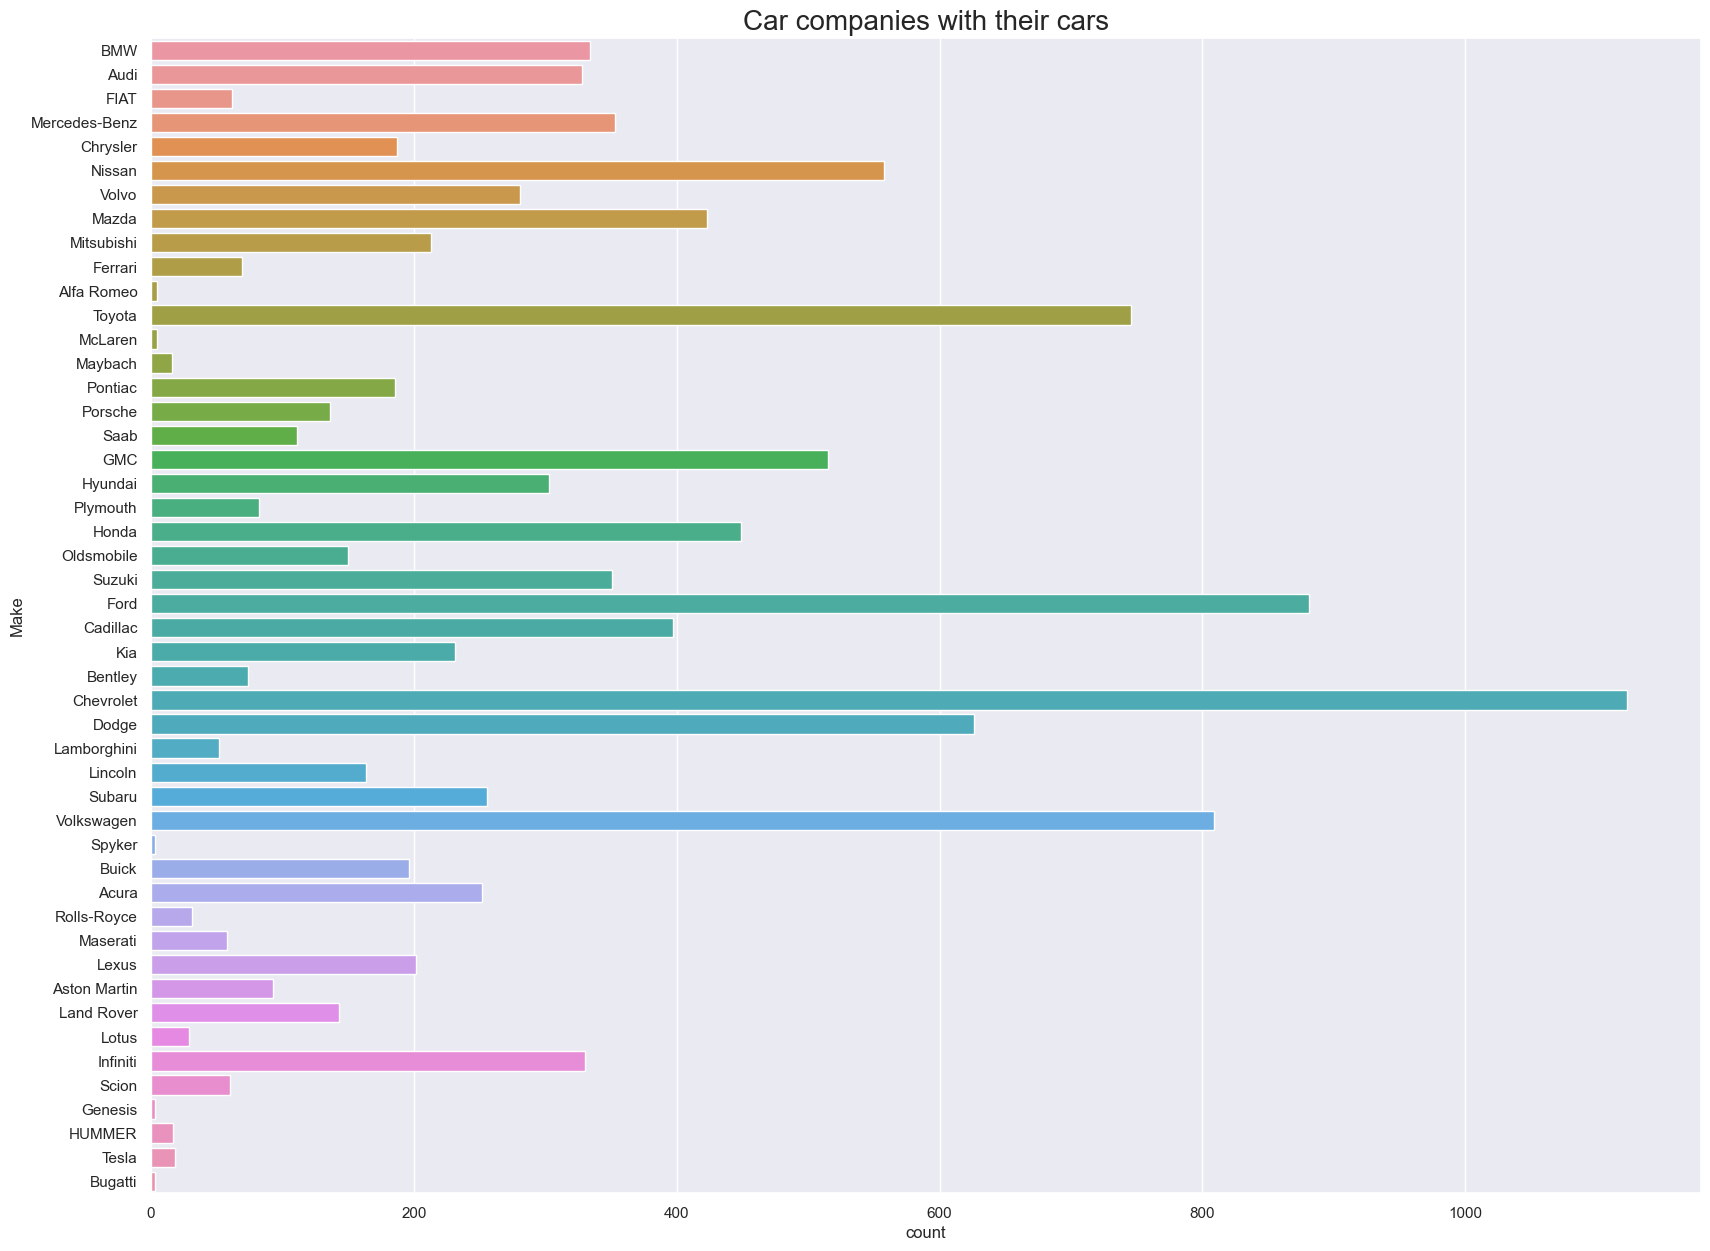

In [123]:
plt.figure(figsize=(20,15))
sns.countplot(y = data.Make)
plt.title("Car companies with their cars", fontsize=20)
plt.show()

2. Countplot of the total cars per different years

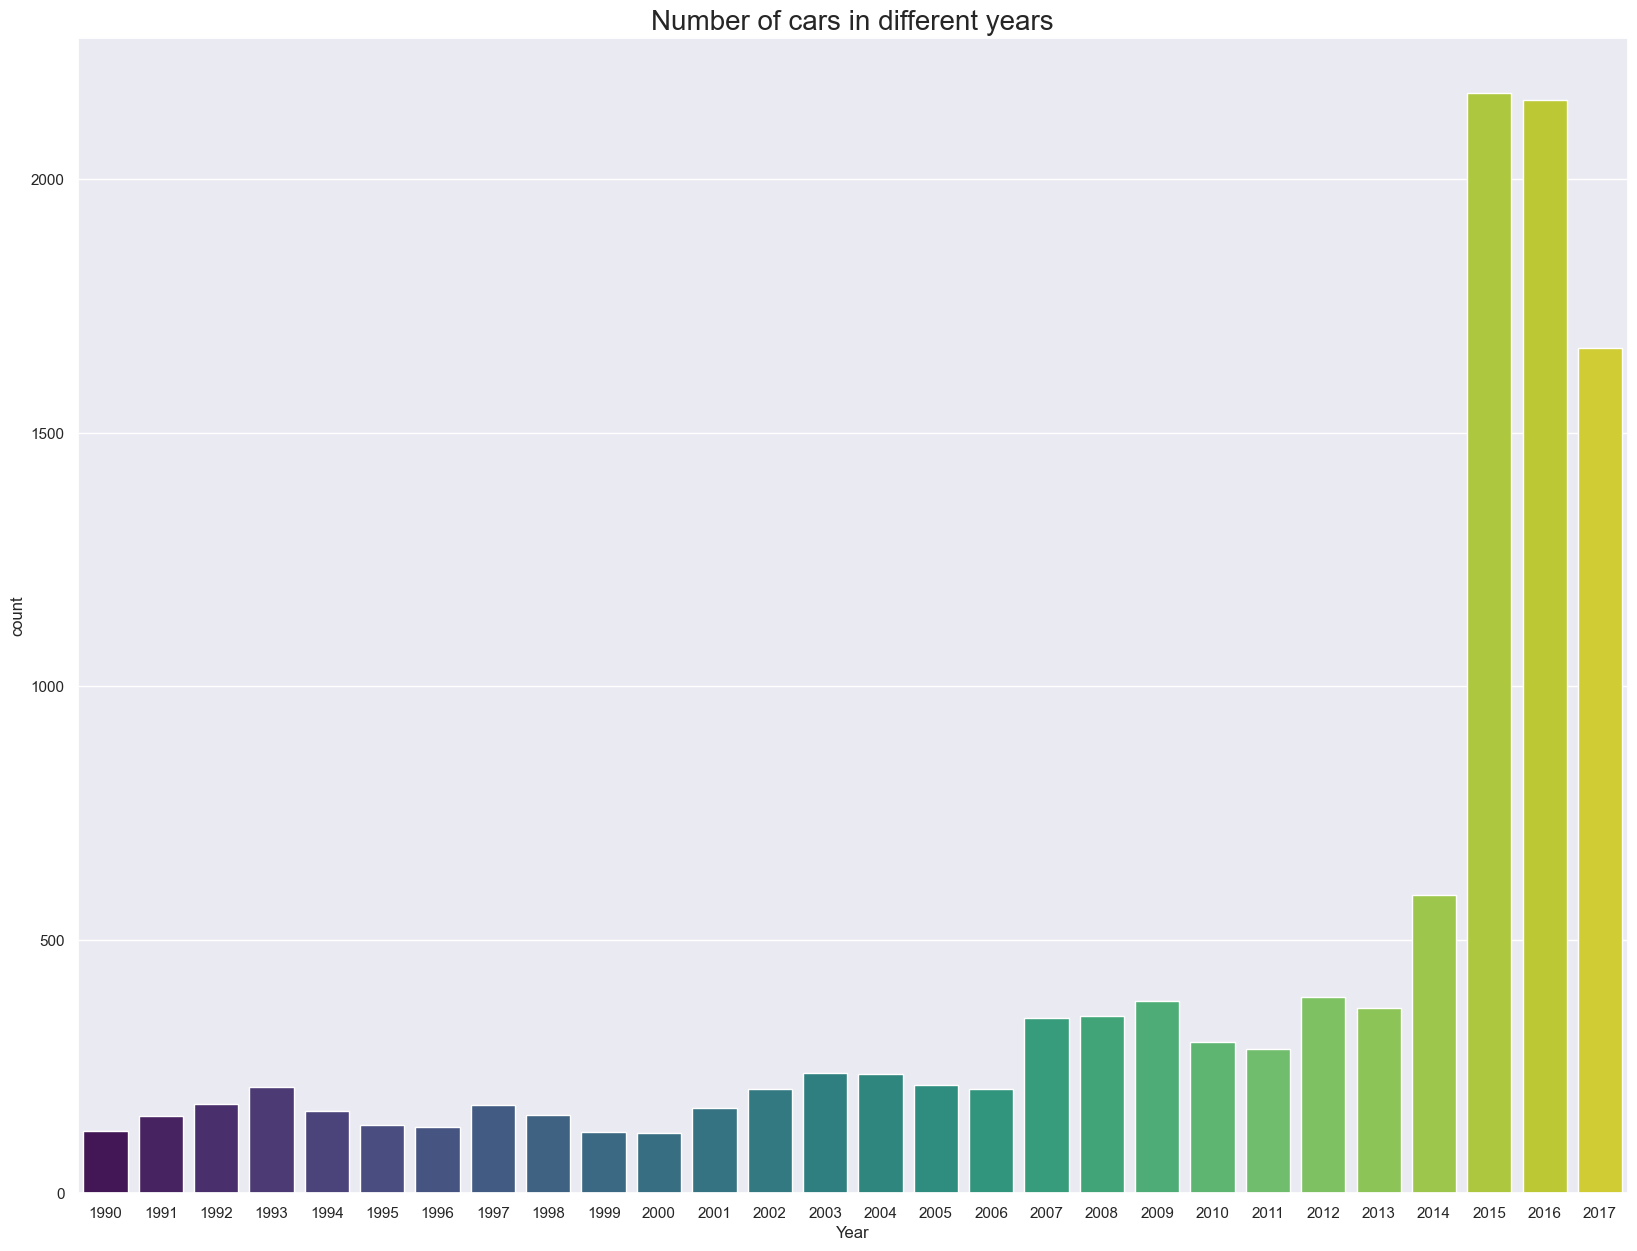

In [124]:
plt.figure(figsize = (20, 15))
sns.countplot(x= data.Year, palette = 'viridis')
plt.title("Number of cars in different years", fontsize = 20)
plt.show()

3. Counting the cars based on transmission type.

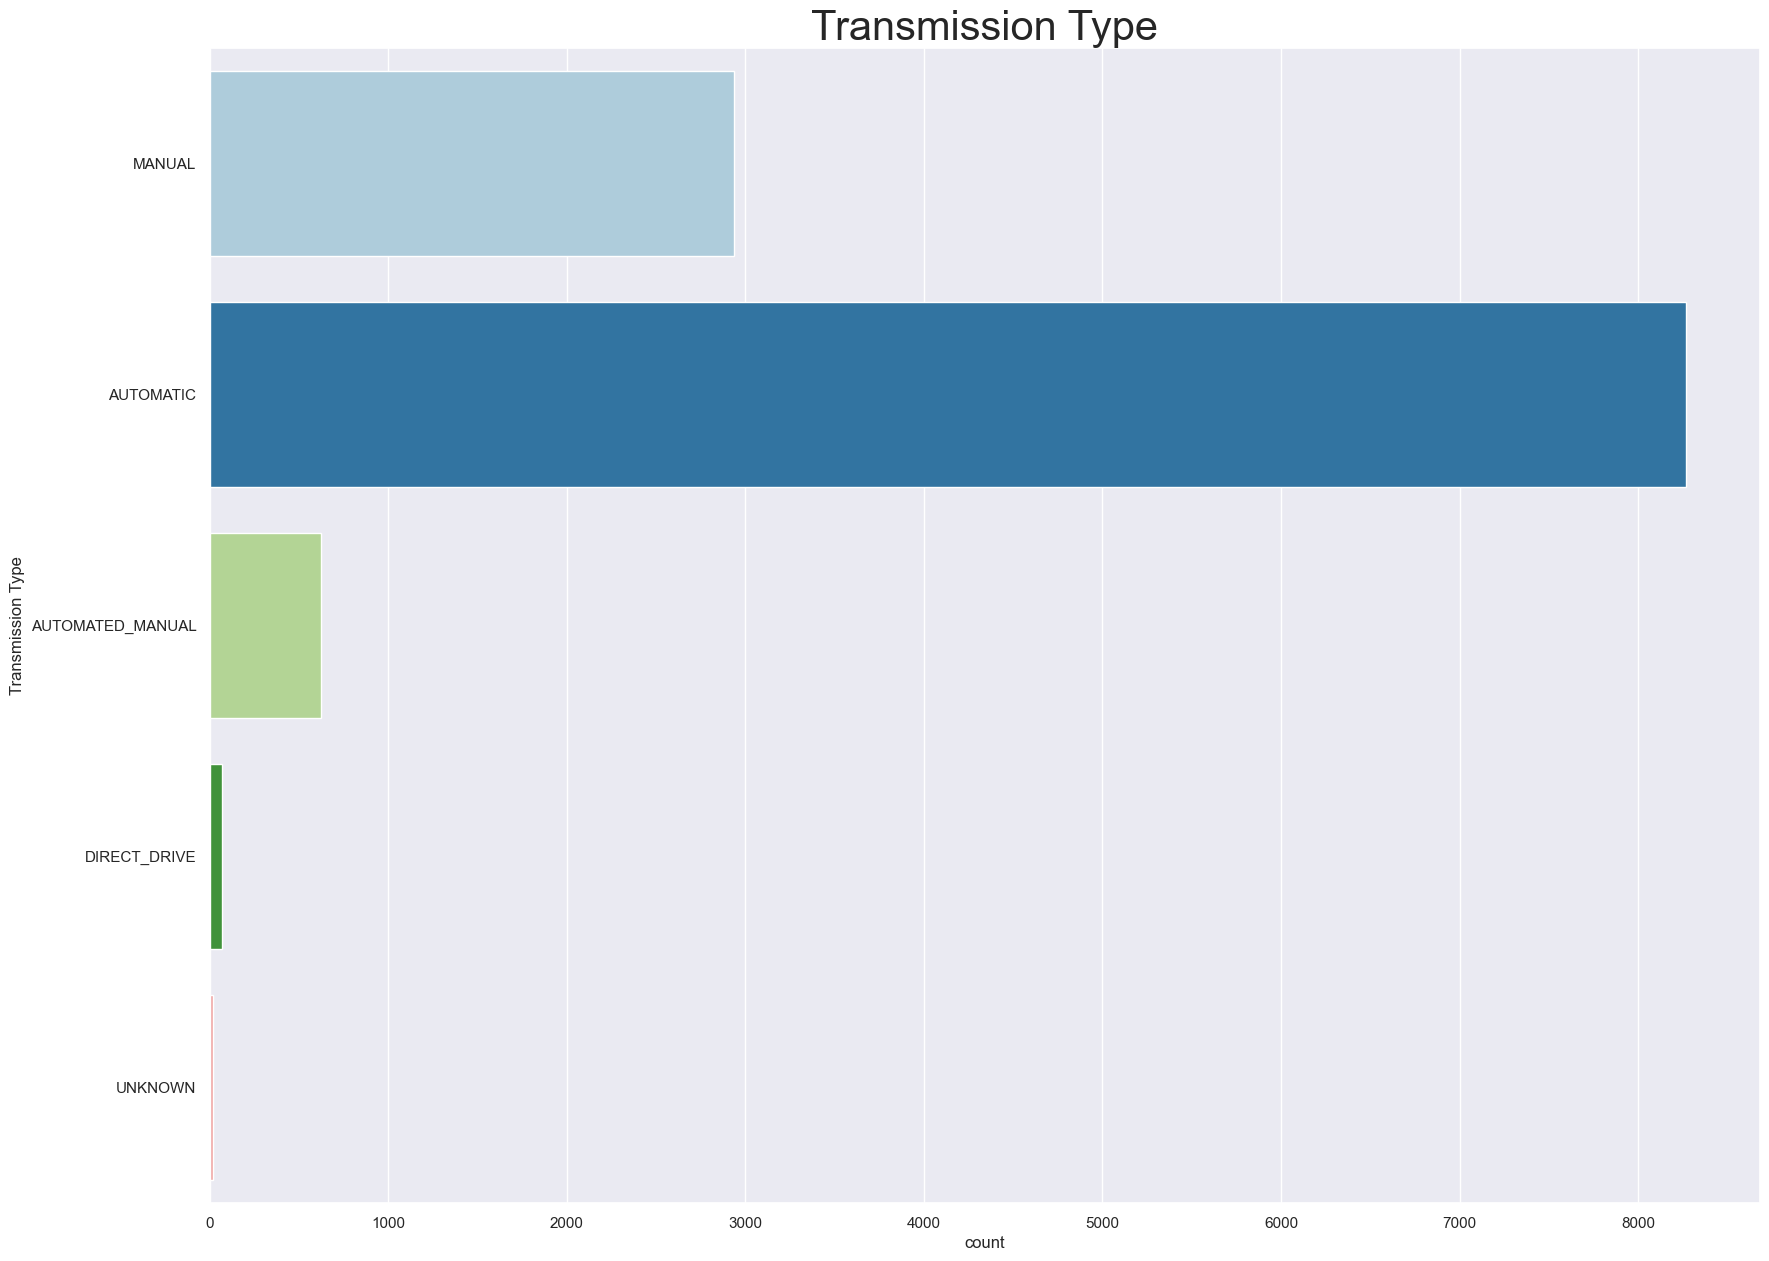

In [125]:
plt.figure(figsize=(20,15))
sns.countplot(y=data['Transmission Type'], palette='Paired')
plt.title('Transmission Type', fontsize = 30)
plt.show()

4. Getting the unique elements from the data

In [126]:
data.nunique() #gets unique elements from each category

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [127]:
data.head() #gets the first n rows of the caller object (default n = 5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


5. Countplot of Engine Fuel Type

<AxesSubplot: xlabel='count', ylabel='Engine Fuel Type'>

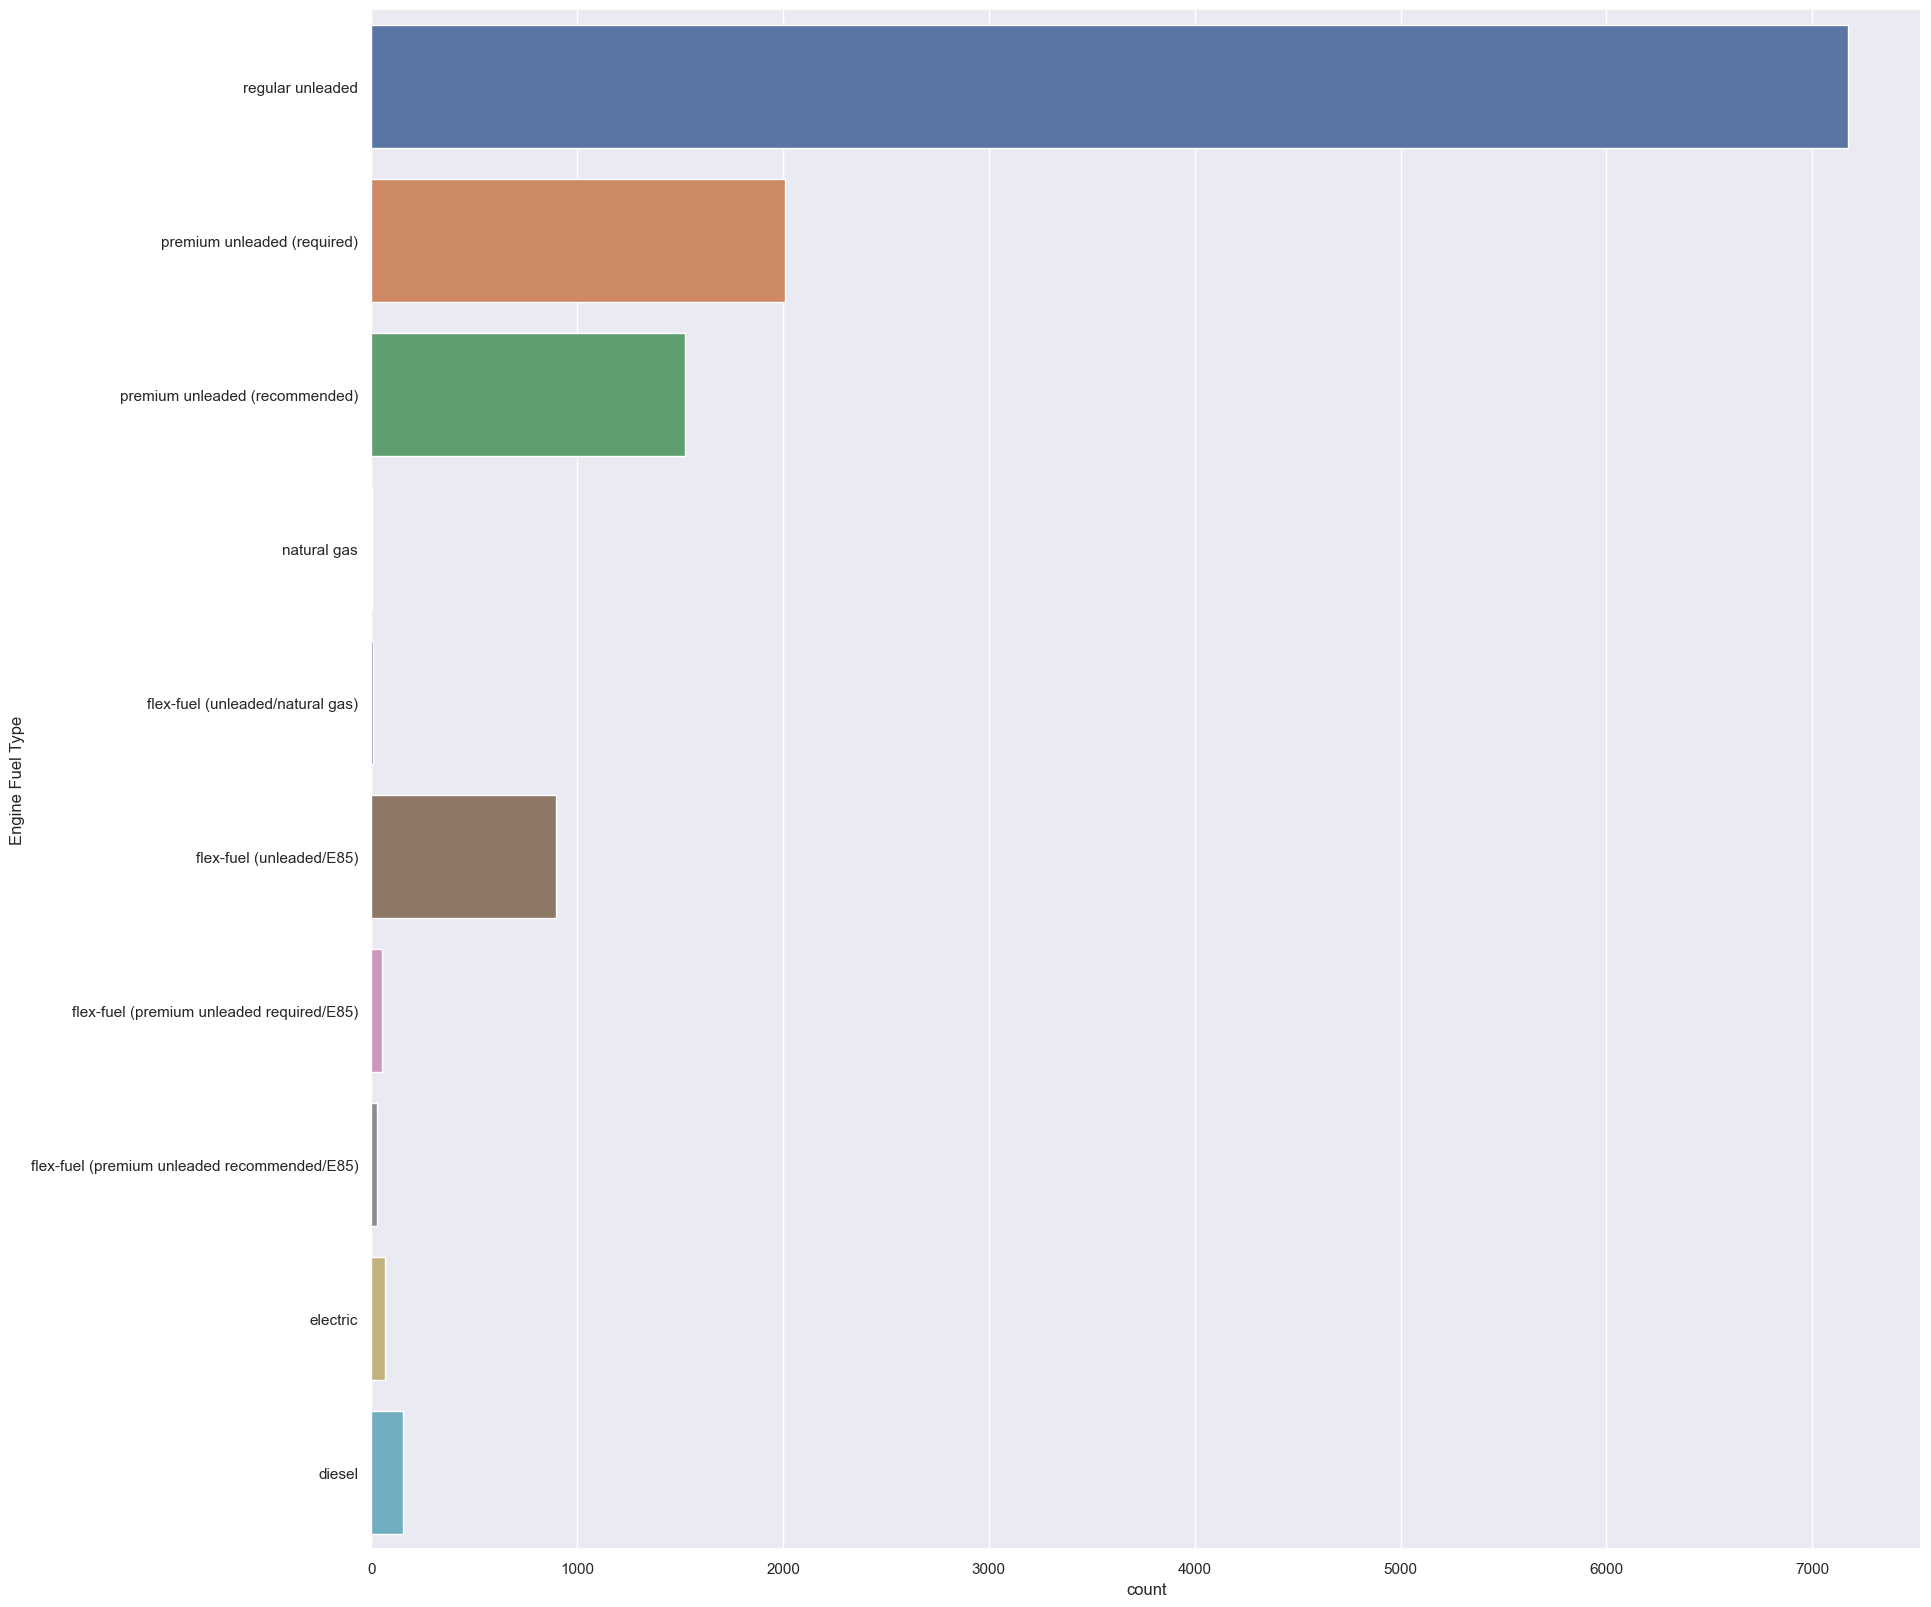

In [128]:
plt.Figure(figsize=(15,10))
sns.countplot(y=data['Engine Fuel Type'].sort_values(ascending = False),)

6. Countplot of Vehicle Size

<AxesSubplot: xlabel='Vehicle Size', ylabel='count'>

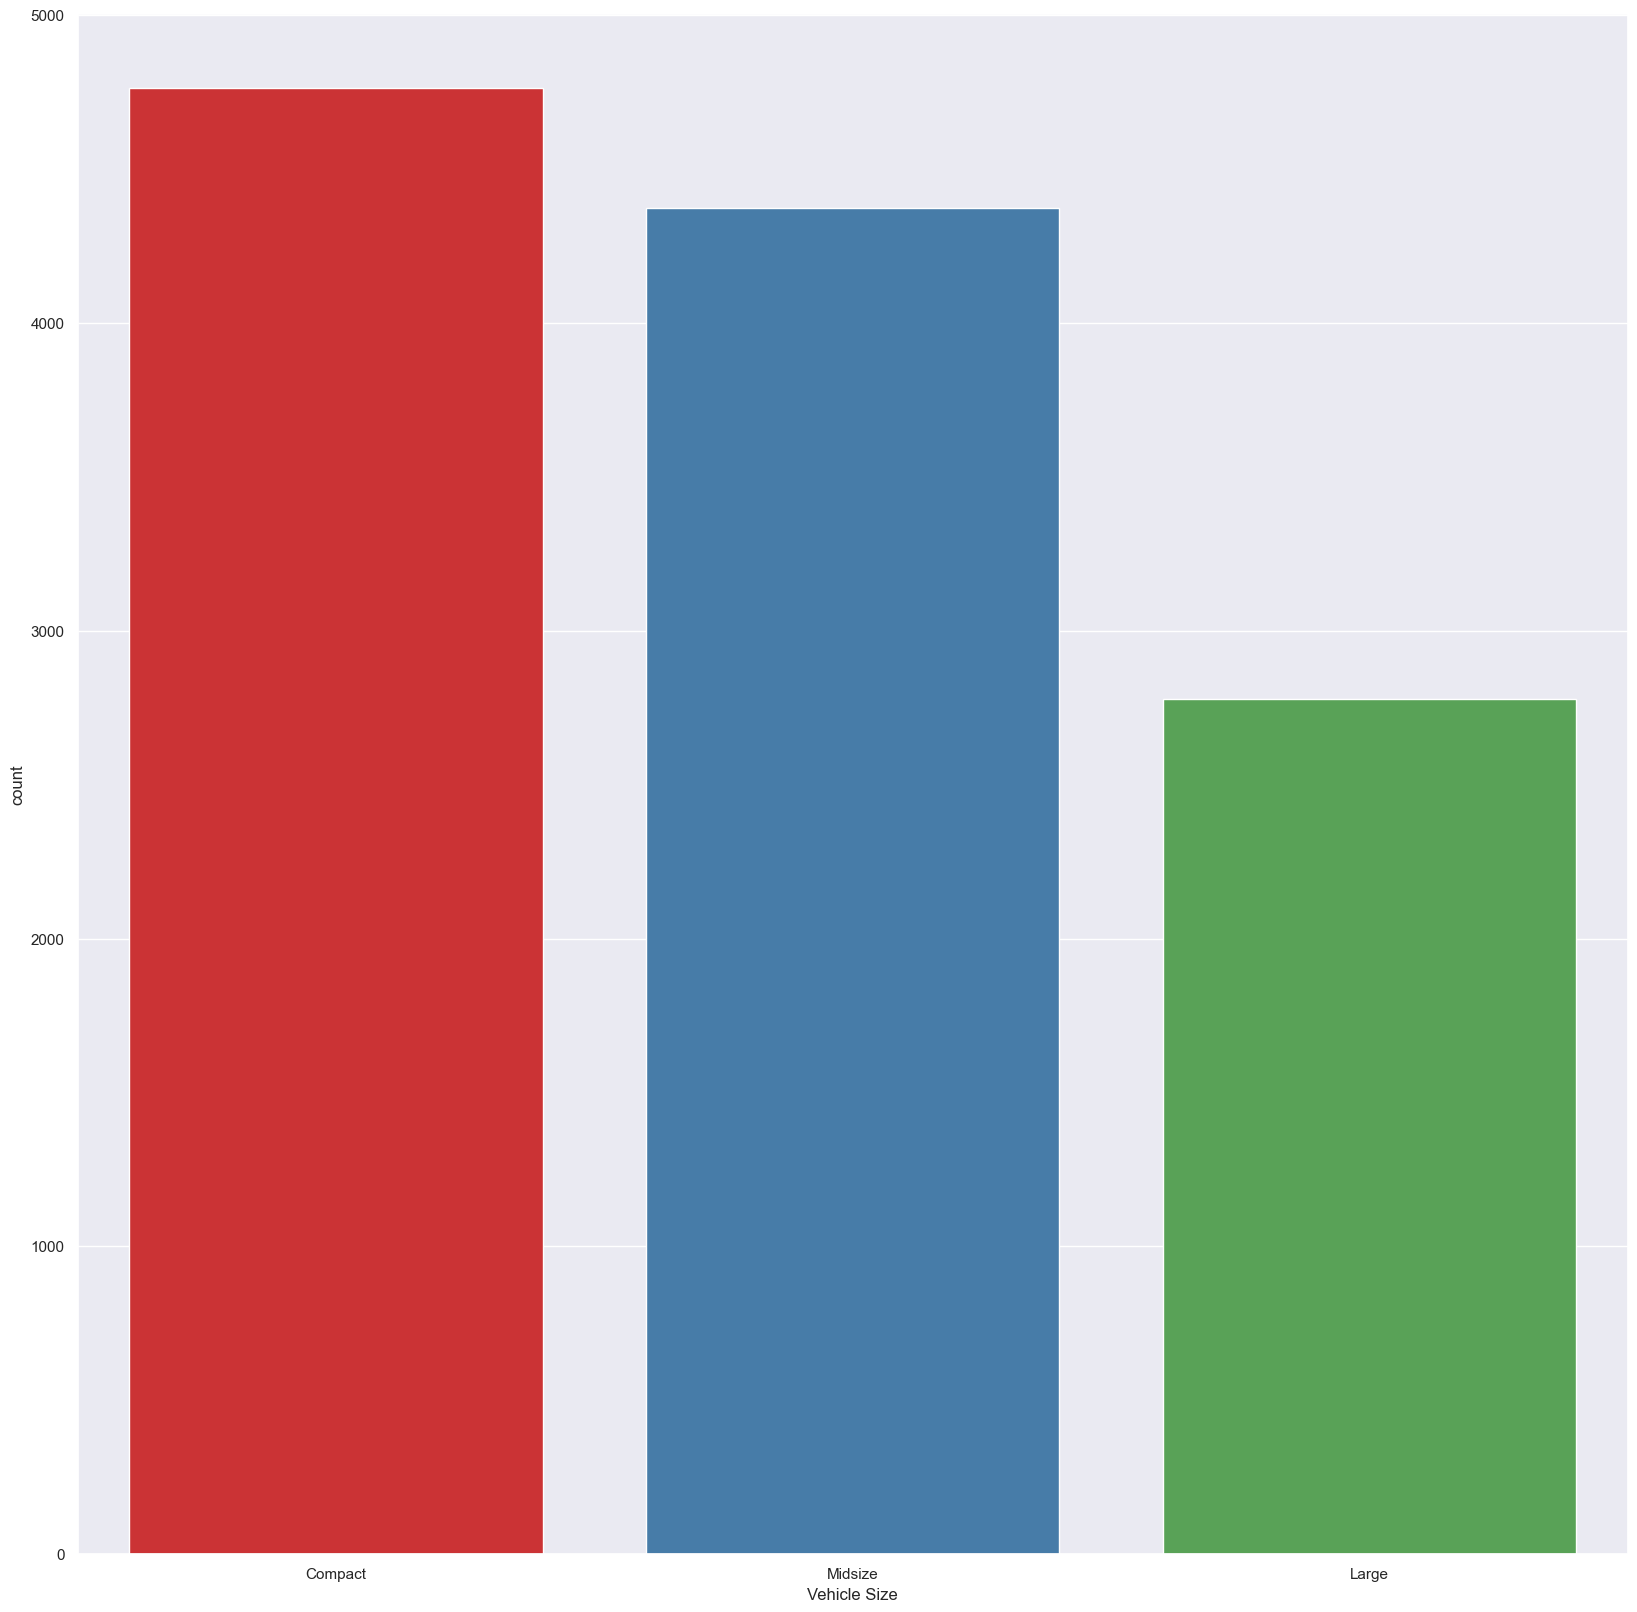

In [129]:
plt.Figure(figsize=(10,15))
sns.countplot(x=data['Vehicle Size'], palette = 'Set1')

7. A graphical representation of missing values in the data using Missigno

<AxesSubplot: >

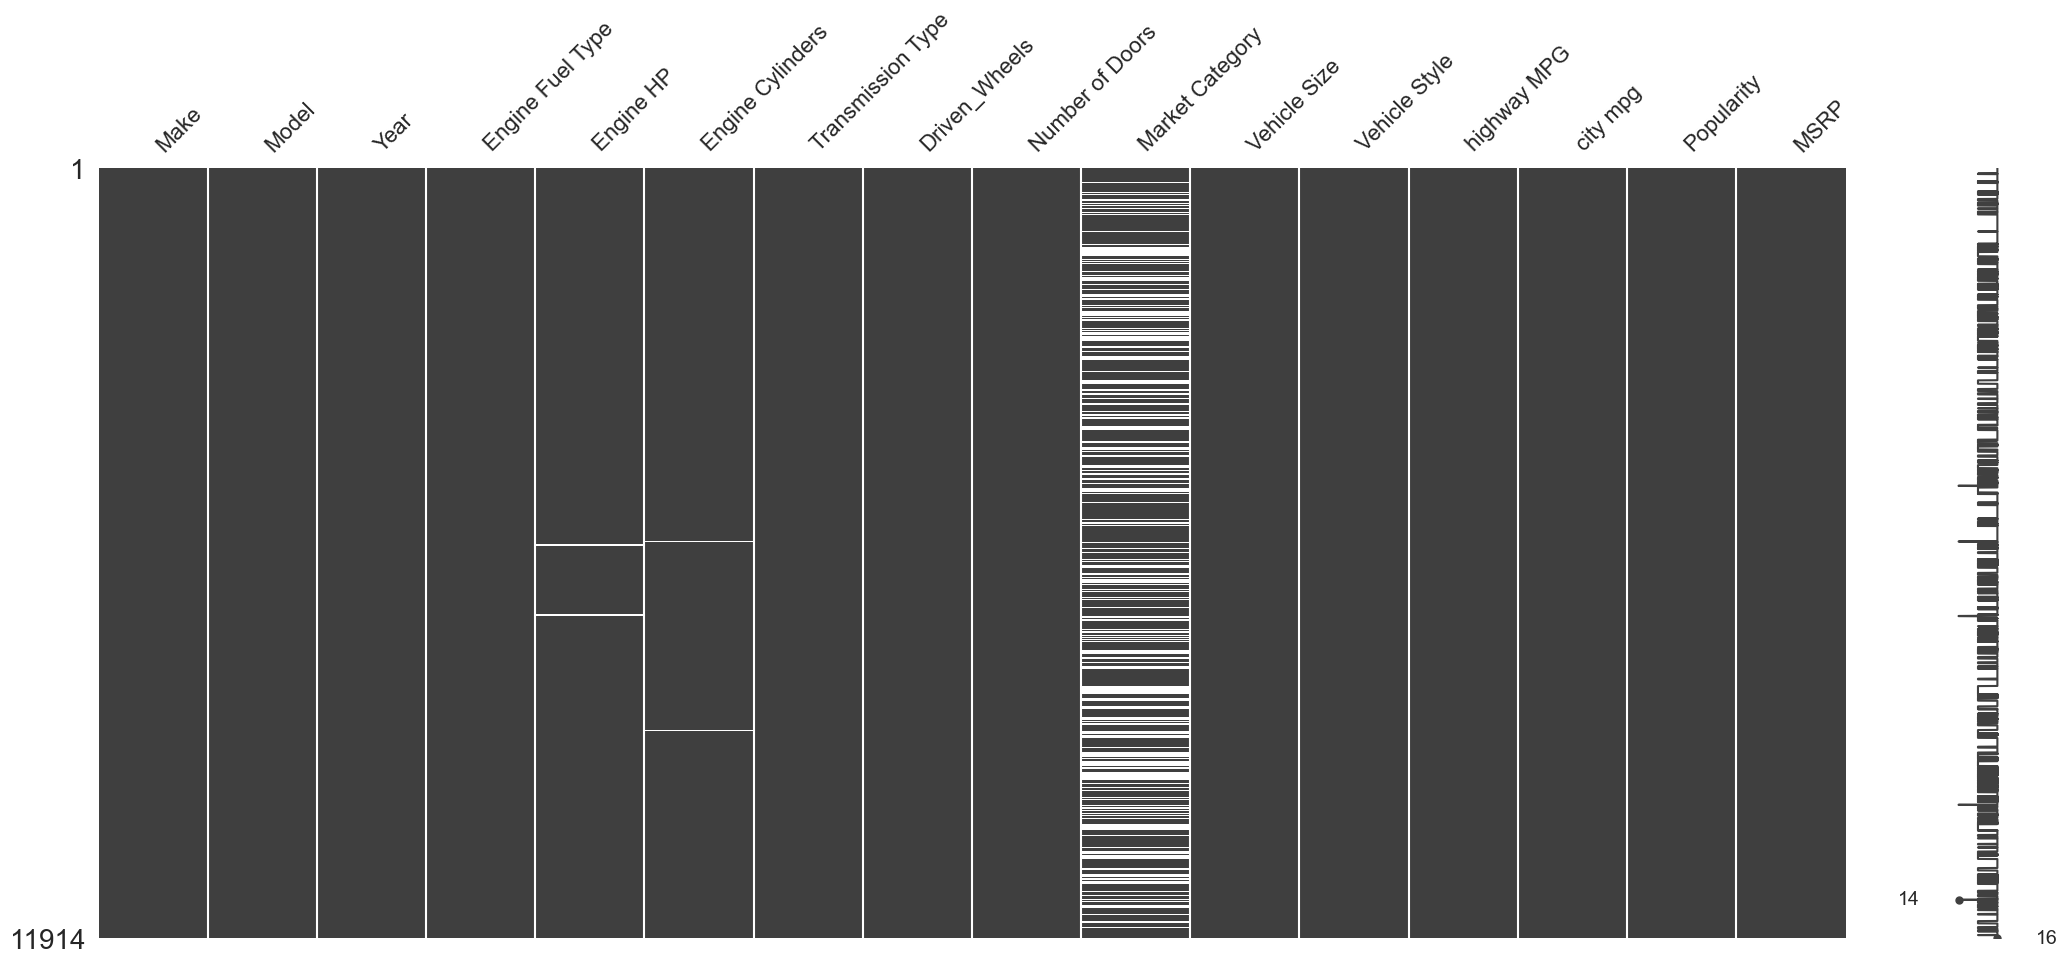

In [130]:
msno.matrix(data)

8. Group by function to get insights on consumption by Engine Cylinders

In [131]:
data.groupby('Engine Cylinders')[['Engine HP', 'highway MPG', 'city mpg']].agg(['min', 'max', 'mean'])


Engine HP                      highway MPG                  \
                       min     max         mean         min  max       mean   
Engine Cylinders                                                              
0.0                  140.0   177.0   157.769231          74  111  99.267857   
3.0                   55.0   123.0    74.866667          29   44  38.666667   
4.0                   62.0   375.0   172.763019          15  354  31.504209   
5.0                  121.0   360.0   193.208889          18   33  26.657778   
6.0                  116.0   600.0   261.085178          13   39  23.880820   
8.0                  125.0   707.0   366.669621          12   29  20.082718   
10.0                 310.0   645.0   578.117647          15   22  20.014706   
12.0                 322.0   750.0   548.800000          12   22  17.730435   
16.0                1001.0  1001.0  1001.000000          14   14  14.000000   

                 city mpg                   
                      min  max        mean  
Engine Cylinders                            
0.0                    78  137  111.196429  
3.0                    24   37   32.033333  
4.0                    14   58   23.849327  
5.0                    13   24   19.191111  
6.0                    11   32   17.057697  
8.0                     9   20   14.130970  
10.0                    9   15   12.544118  
12.0                    7   14   11.247826  
16.0                    8    8    8.000000

9. Grouping data on year basis:
Checking the average prices of cars by years

<AxesSubplot: xlabel='Year'>

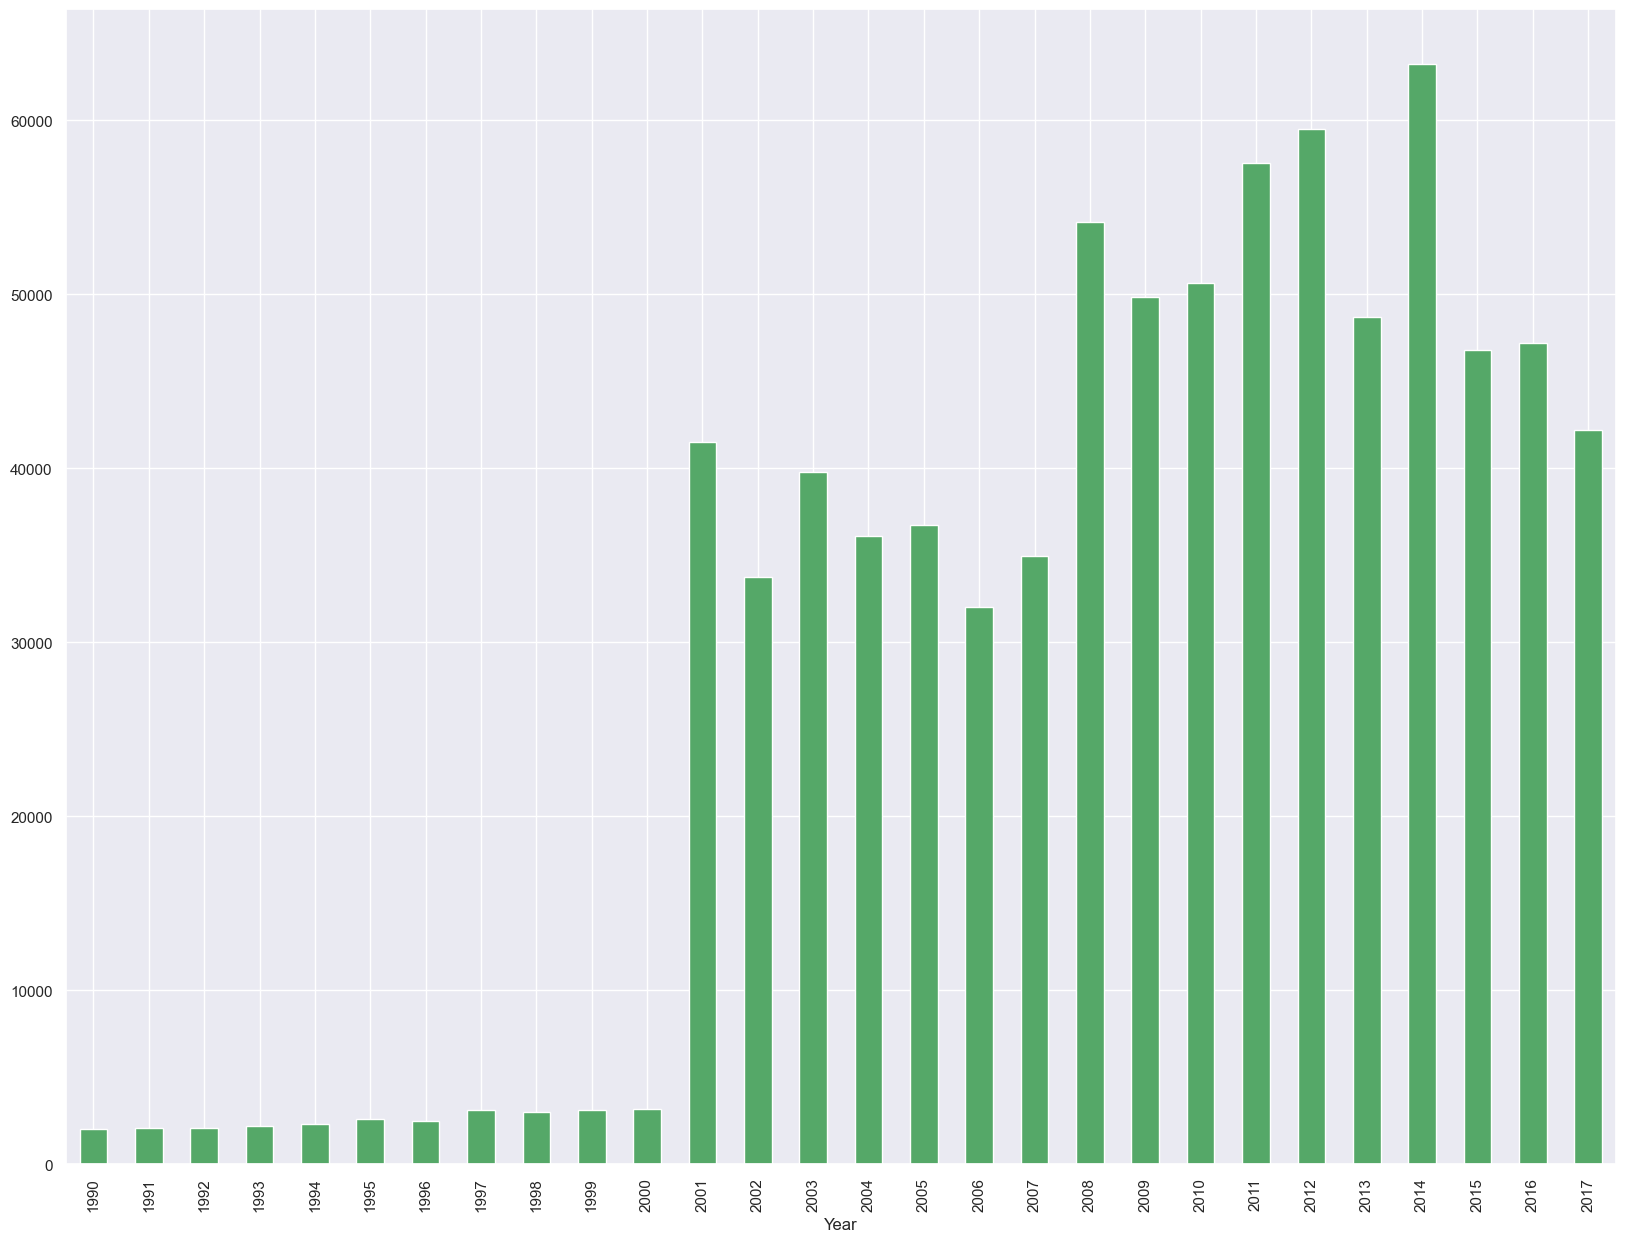

In [132]:
plt.figure(figsize= (20,15))
data.groupby('Year')['MSRP'].mean().plot(kind = 'bar', color = 'g')


10. Grouping by make and MSRP

<AxesSubplot: xlabel='Make'>

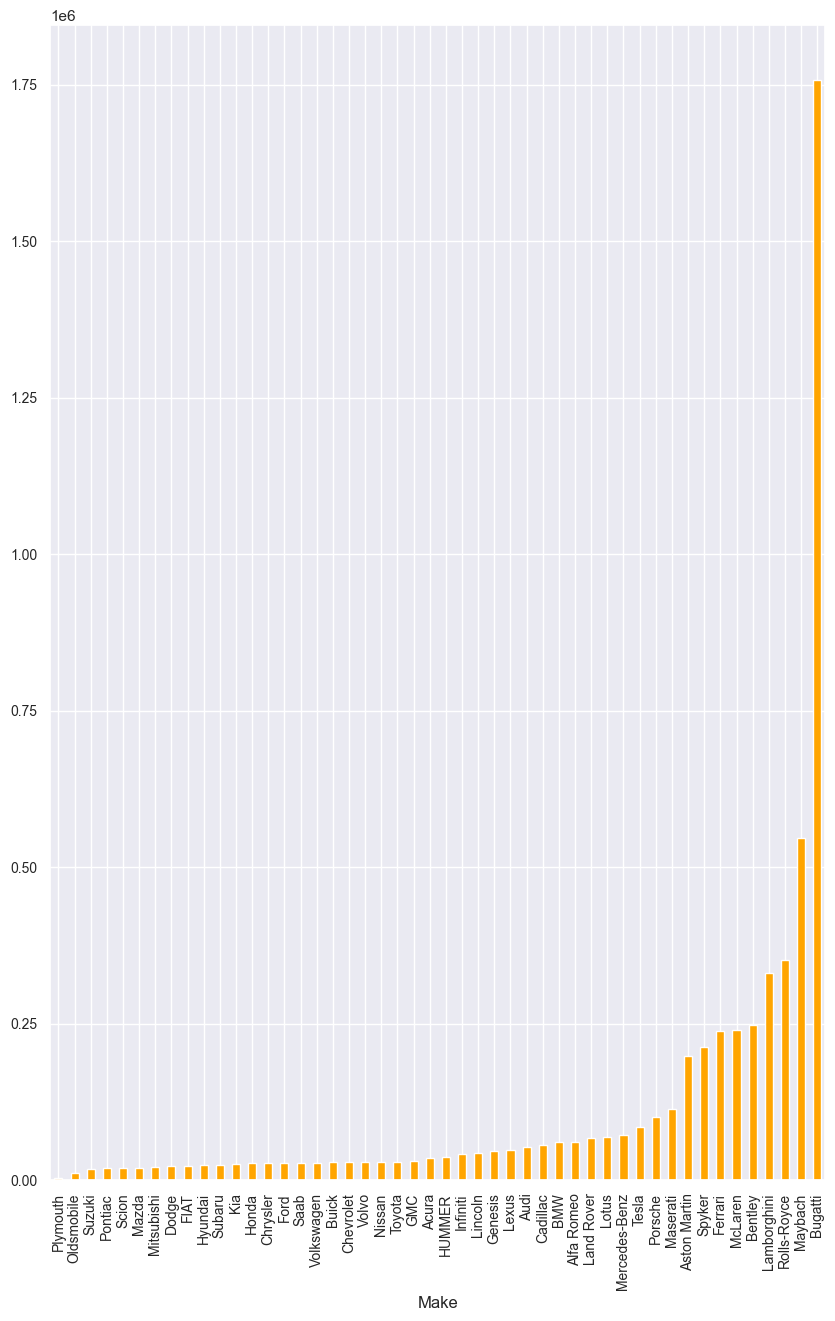

In [133]:
plt.figure(figsize=(10,15))
data.groupby(['Make']).mean()['MSRP'].sort_values(ascending = True).plot(kind = 'bar', fontsize = 10, color = 'orange')



11. Grouping by Engine HP and Makes

<AxesSubplot: ylabel='Make'>

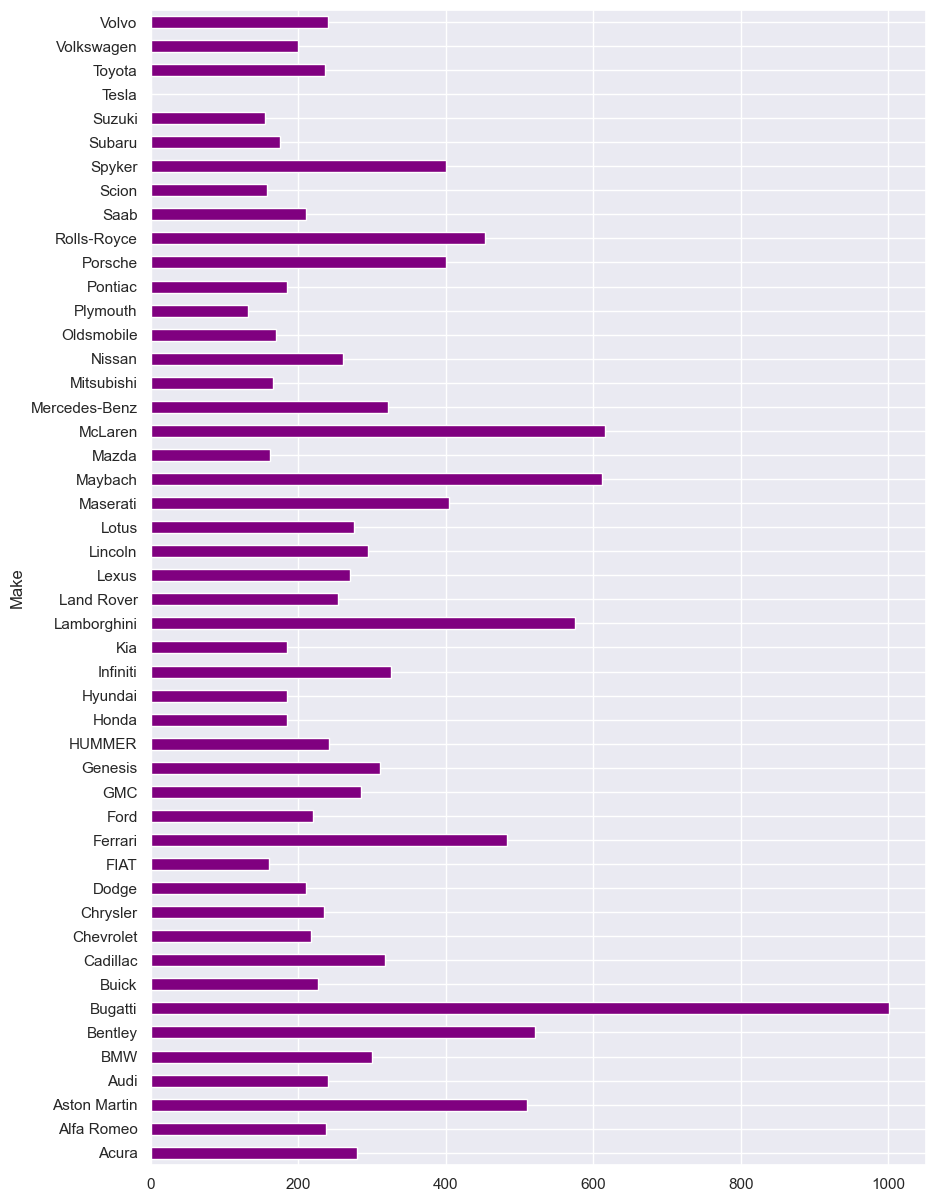

In [134]:
plt.figure(figsize =(10,15))
data.groupby('Make').median()['Engine HP'].plot(kind = 'barh', color= 'purple')



12. Grouping by popularity

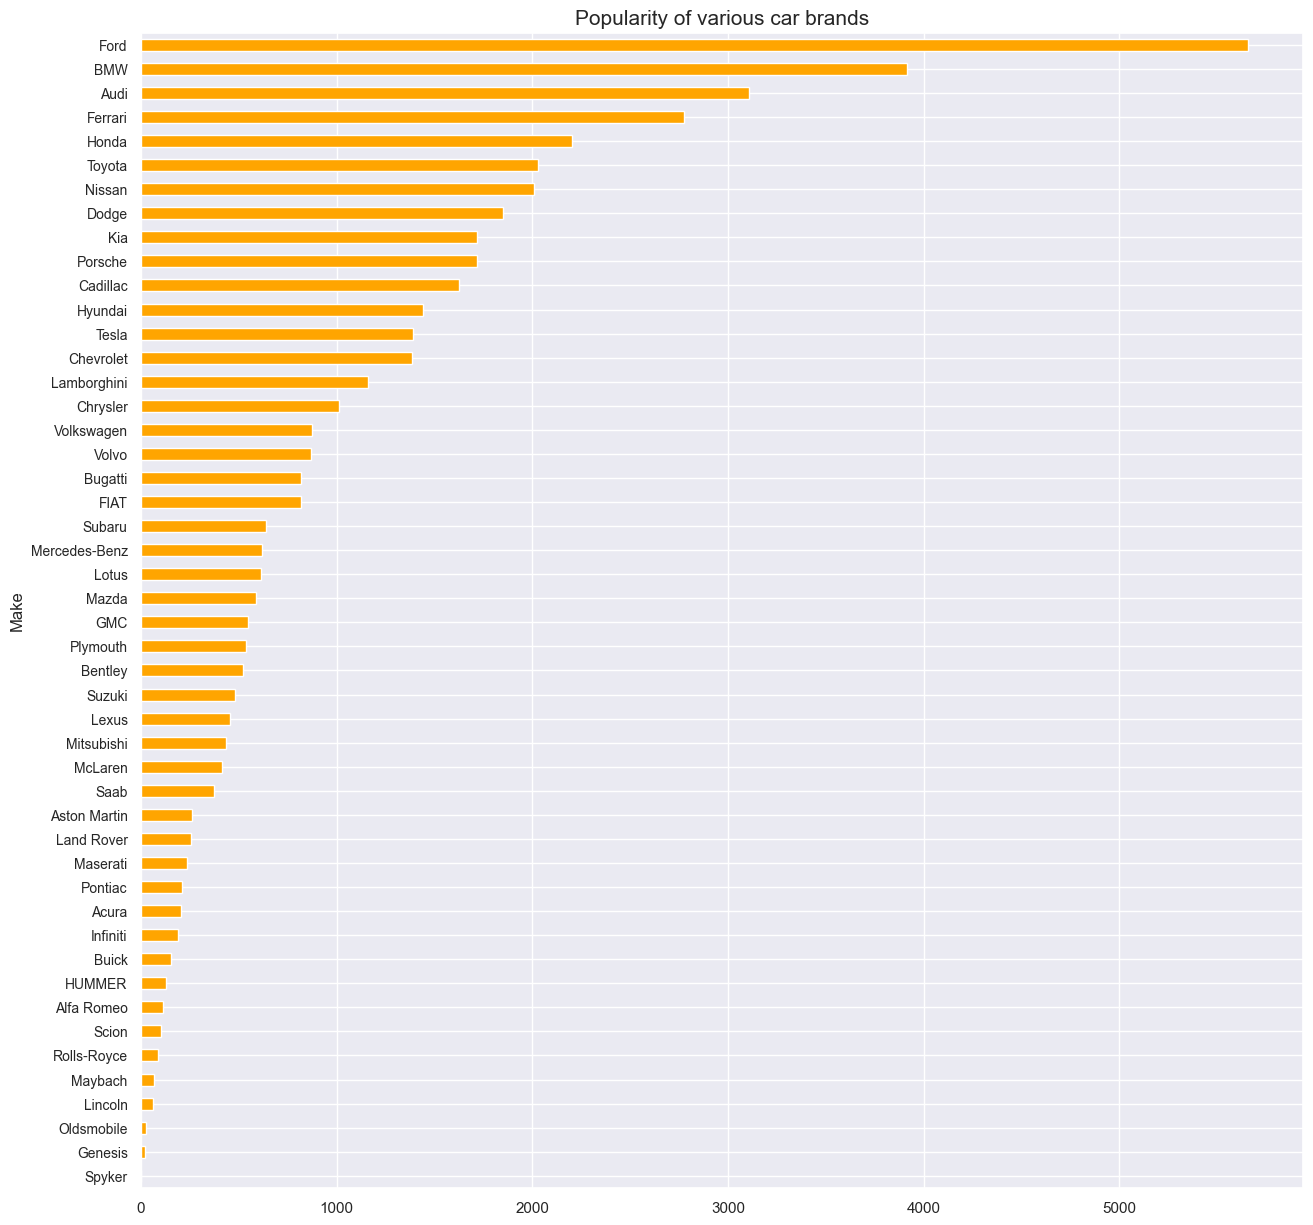

In [135]:
plt.figure(figsize = (15, 15))
data.groupby('Make').mean()['Popularity'].sort_values(ascending = True).plot(kind = 'barh', color = 'orange')
plt.yticks(fontsize = 10)
plt.title("Popularity of various car brands", fontsize = 15)
plt.show()

# Scatterplots

1. **Scatterplots:** highway mpg and city mpg

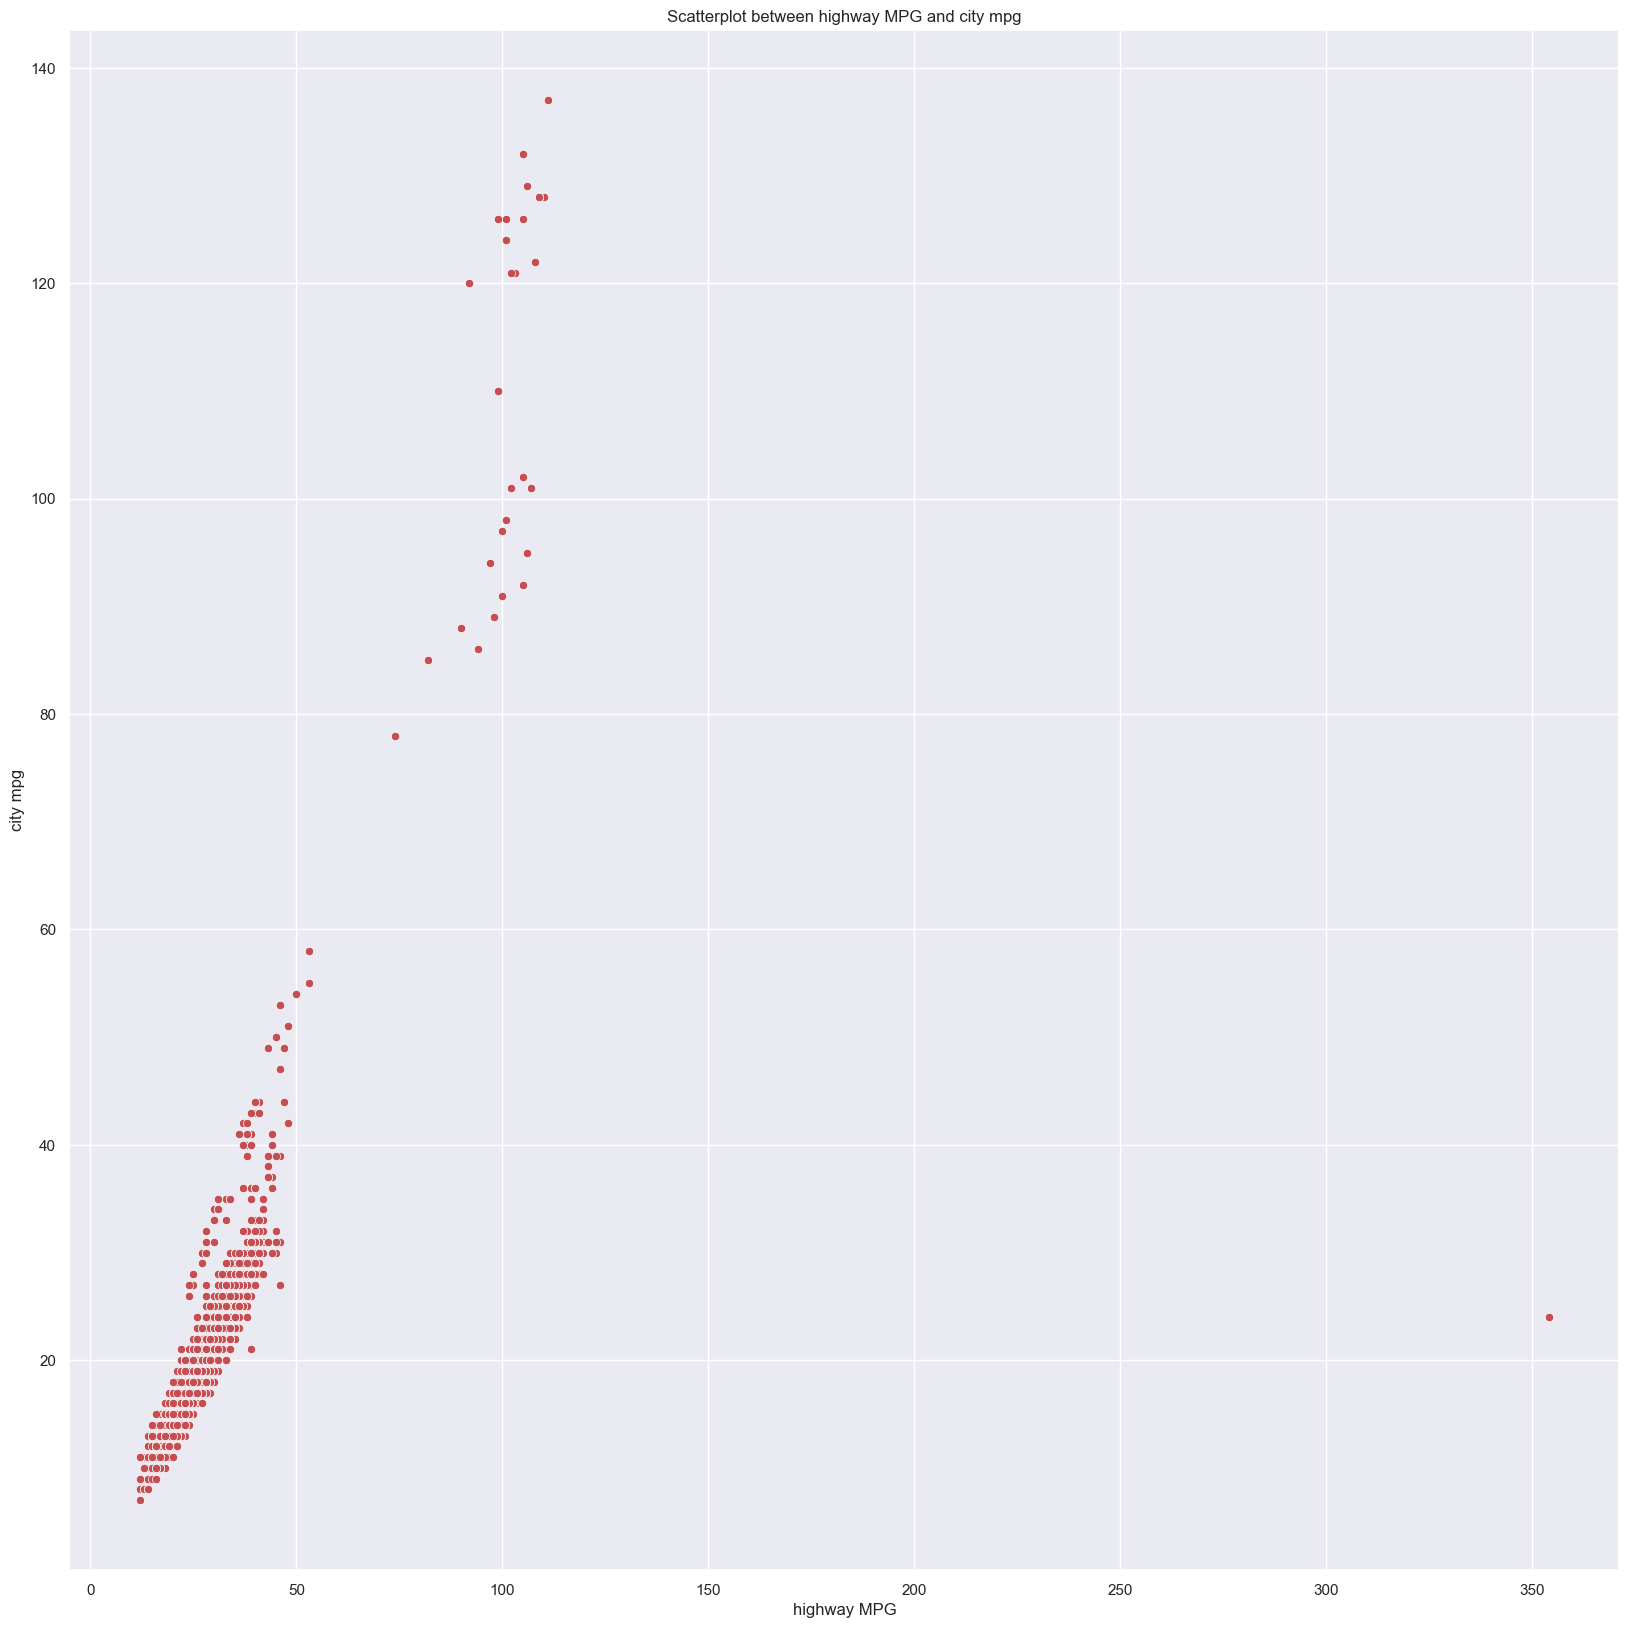

In [136]:
sns.scatterplot(x = 'highway MPG', y = 'city mpg', data = data, color = 'r')
plt.title("Scatterplot between highway MPG and city mpg")
plt.show()

The outlier in the data has to be removed

We can identify the outlier:

In [137]:
data[data['highway MPG'] > 350]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600


In [138]:
data = data[data['highway MPG'] < 350]


Now we create the scatterplot again, without the outlier.

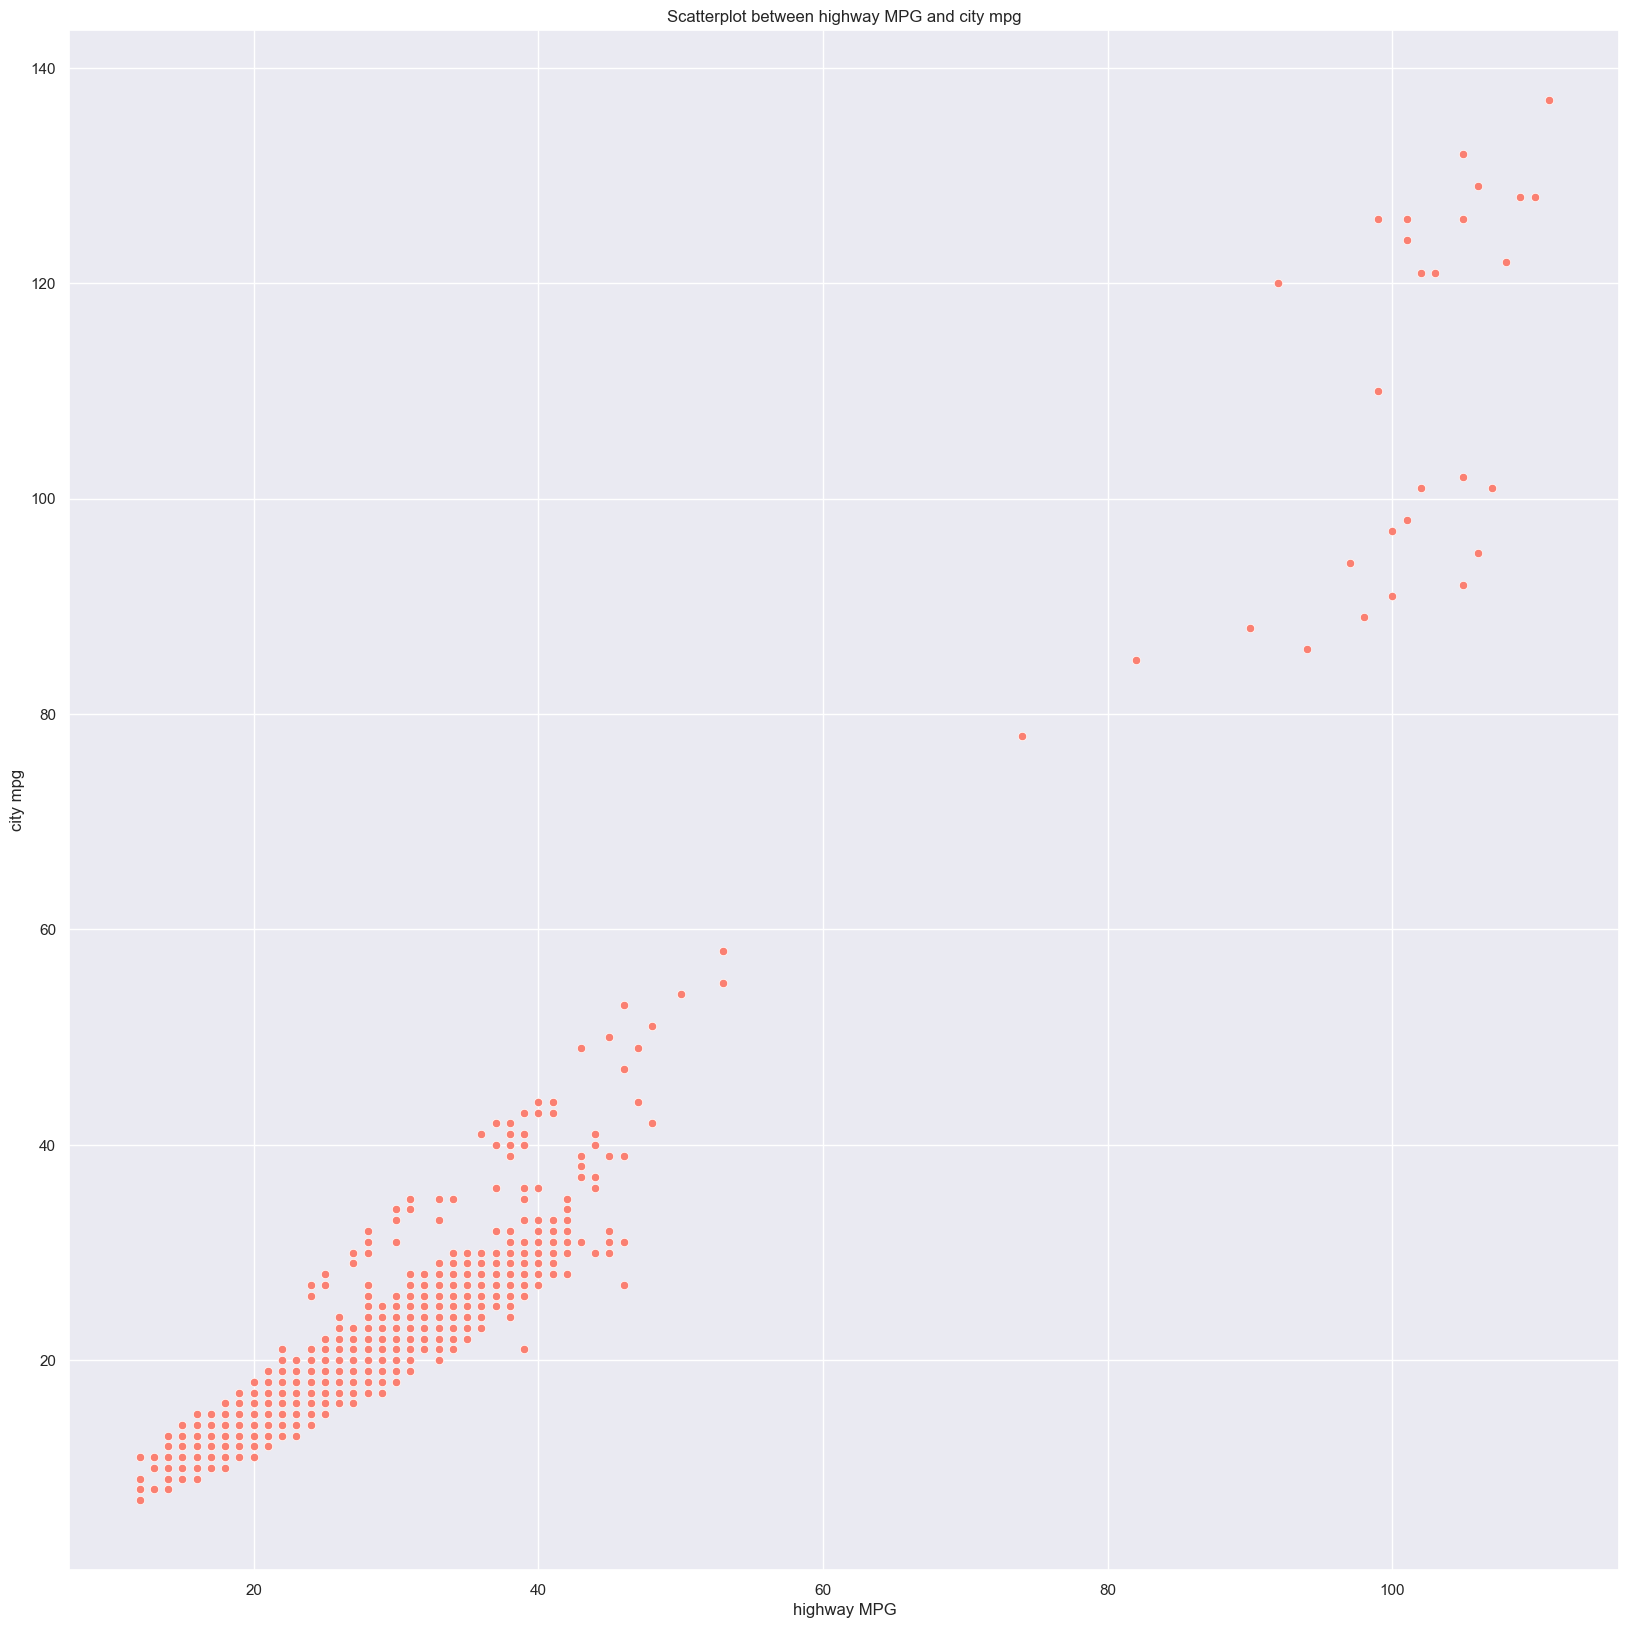

In [139]:
sns.scatterplot(x = 'highway MPG', y ='city mpg', data = data, color = 'salmon')
plt.title("Scatterplot between highway MPG and city mpg")
plt.show()


# Boxplots

1. Boxplot of 'highway mpg'

<AxesSubplot: xlabel='highway MPG'>

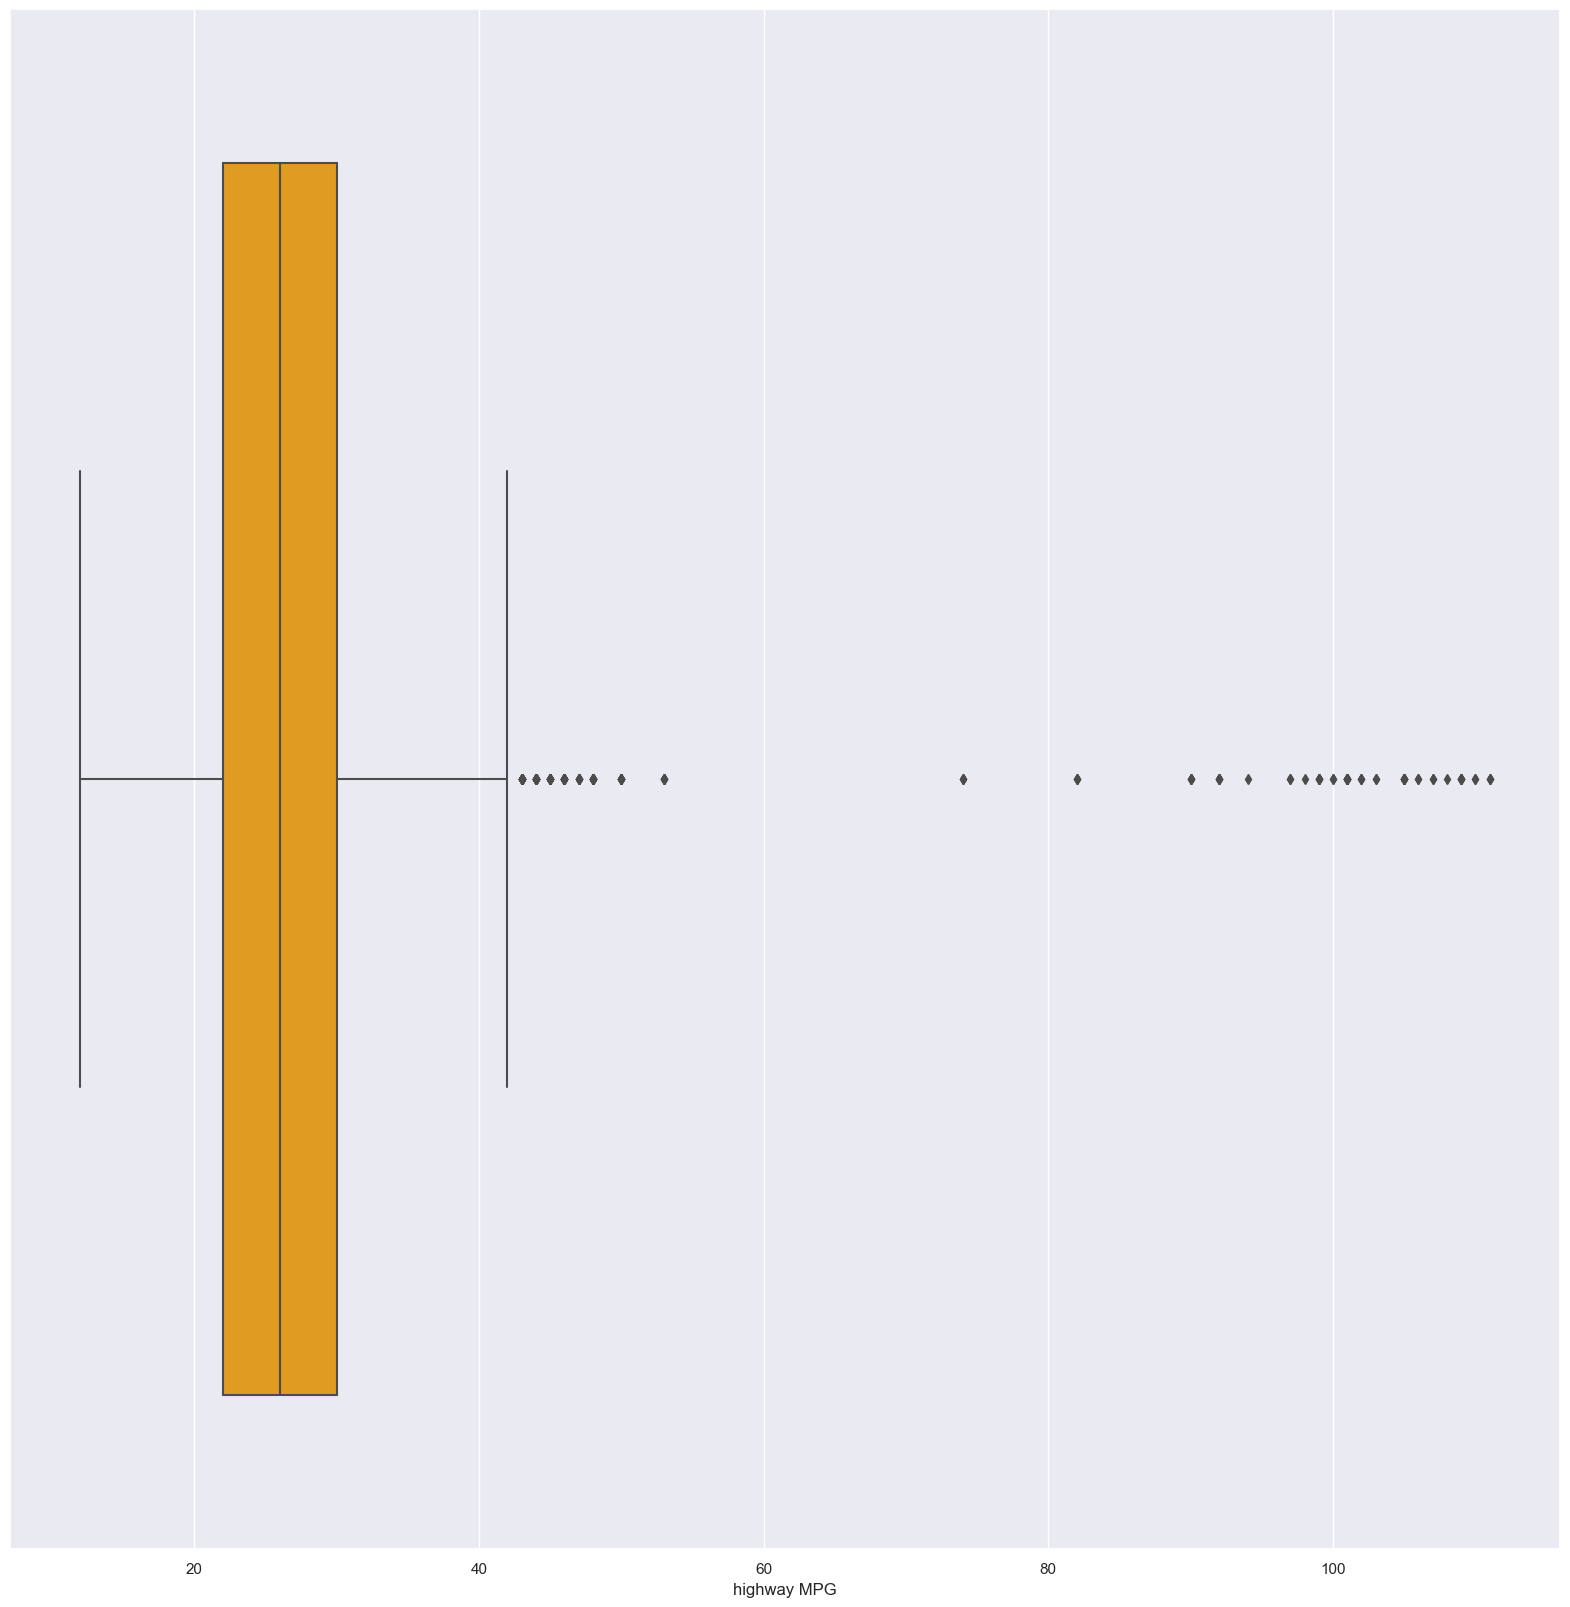

In [140]:
sns.boxplot(x = 'highway MPG', data = data, color = 'orange')


2. Percentiles of highway MPG to understand the outliers

In [141]:
for i in range(90, 100):
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['highway MPG'], i)))

The 90.0th percentile value is 35.00
The 91.0th percentile value is 36.00
The 92.0th percentile value is 36.00
The 93.0th percentile value is 37.00
The 94.0th percentile value is 37.00
The 95.0th percentile value is 38.00
The 96.0th percentile value is 39.00
The 97.0th percentile value is 40.00
The 98.0th percentile value is 42.00
The 99.0th percentile value is 46.00


We can see that there are outliers in the 99.0th percentile, so we will take a closer look:

In [142]:
for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['highway MPG'], i)))

The 99.0th percentile value is 46.00
The 99.1th percentile value is 46.00
The 99.2th percentile value is 48.00
The 99.3th percentile value is 48.00
The 99.4th percentile value is 50.00
The 99.5th percentile value is 85.52
The 99.6th percentile value is 97.35
The 99.7th percentile value is 101.00
The 99.8th percentile value is 103.35
The 99.9th percentile value is 107.09


From the 99.5th percentile values and so on, we find high values (outliers). Therefore we will remove those outliers so that they don't disturb our data and the algorithms.

We will set the bar to be equal to about 60

In [143]:
data = data[data['highway MPG']<60]

Once again, we plot the data.

<AxesSubplot: xlabel='highway MPG'>

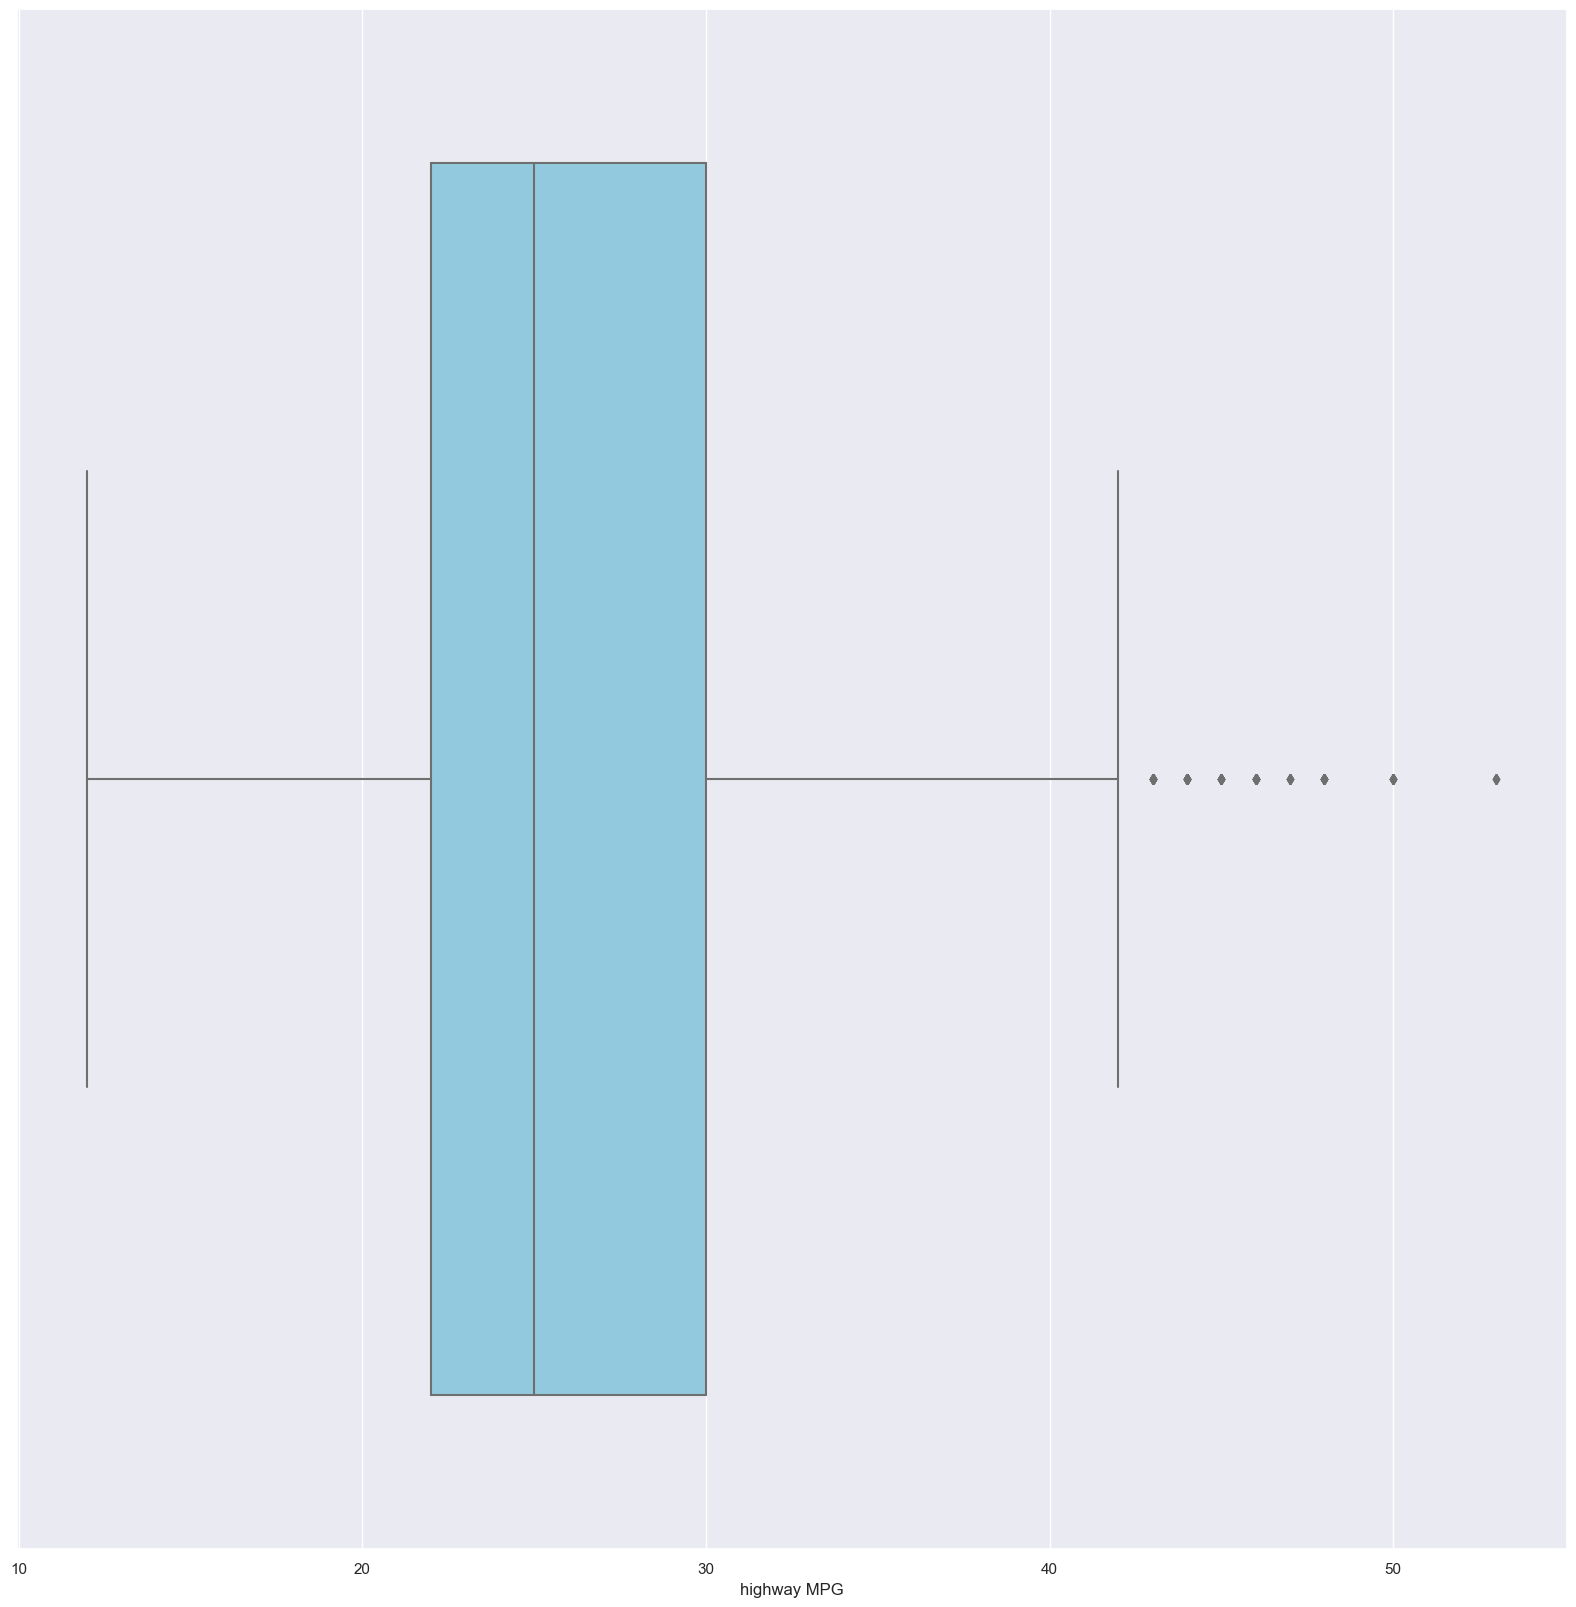

In [144]:
sns.boxplot(x = 'highway MPG', data = data, color = 'skyblue')


3. Boxplot of city mpg

We also can find some outliers in city mpg, so we will repeat the process.

<AxesSubplot: xlabel='city mpg'>

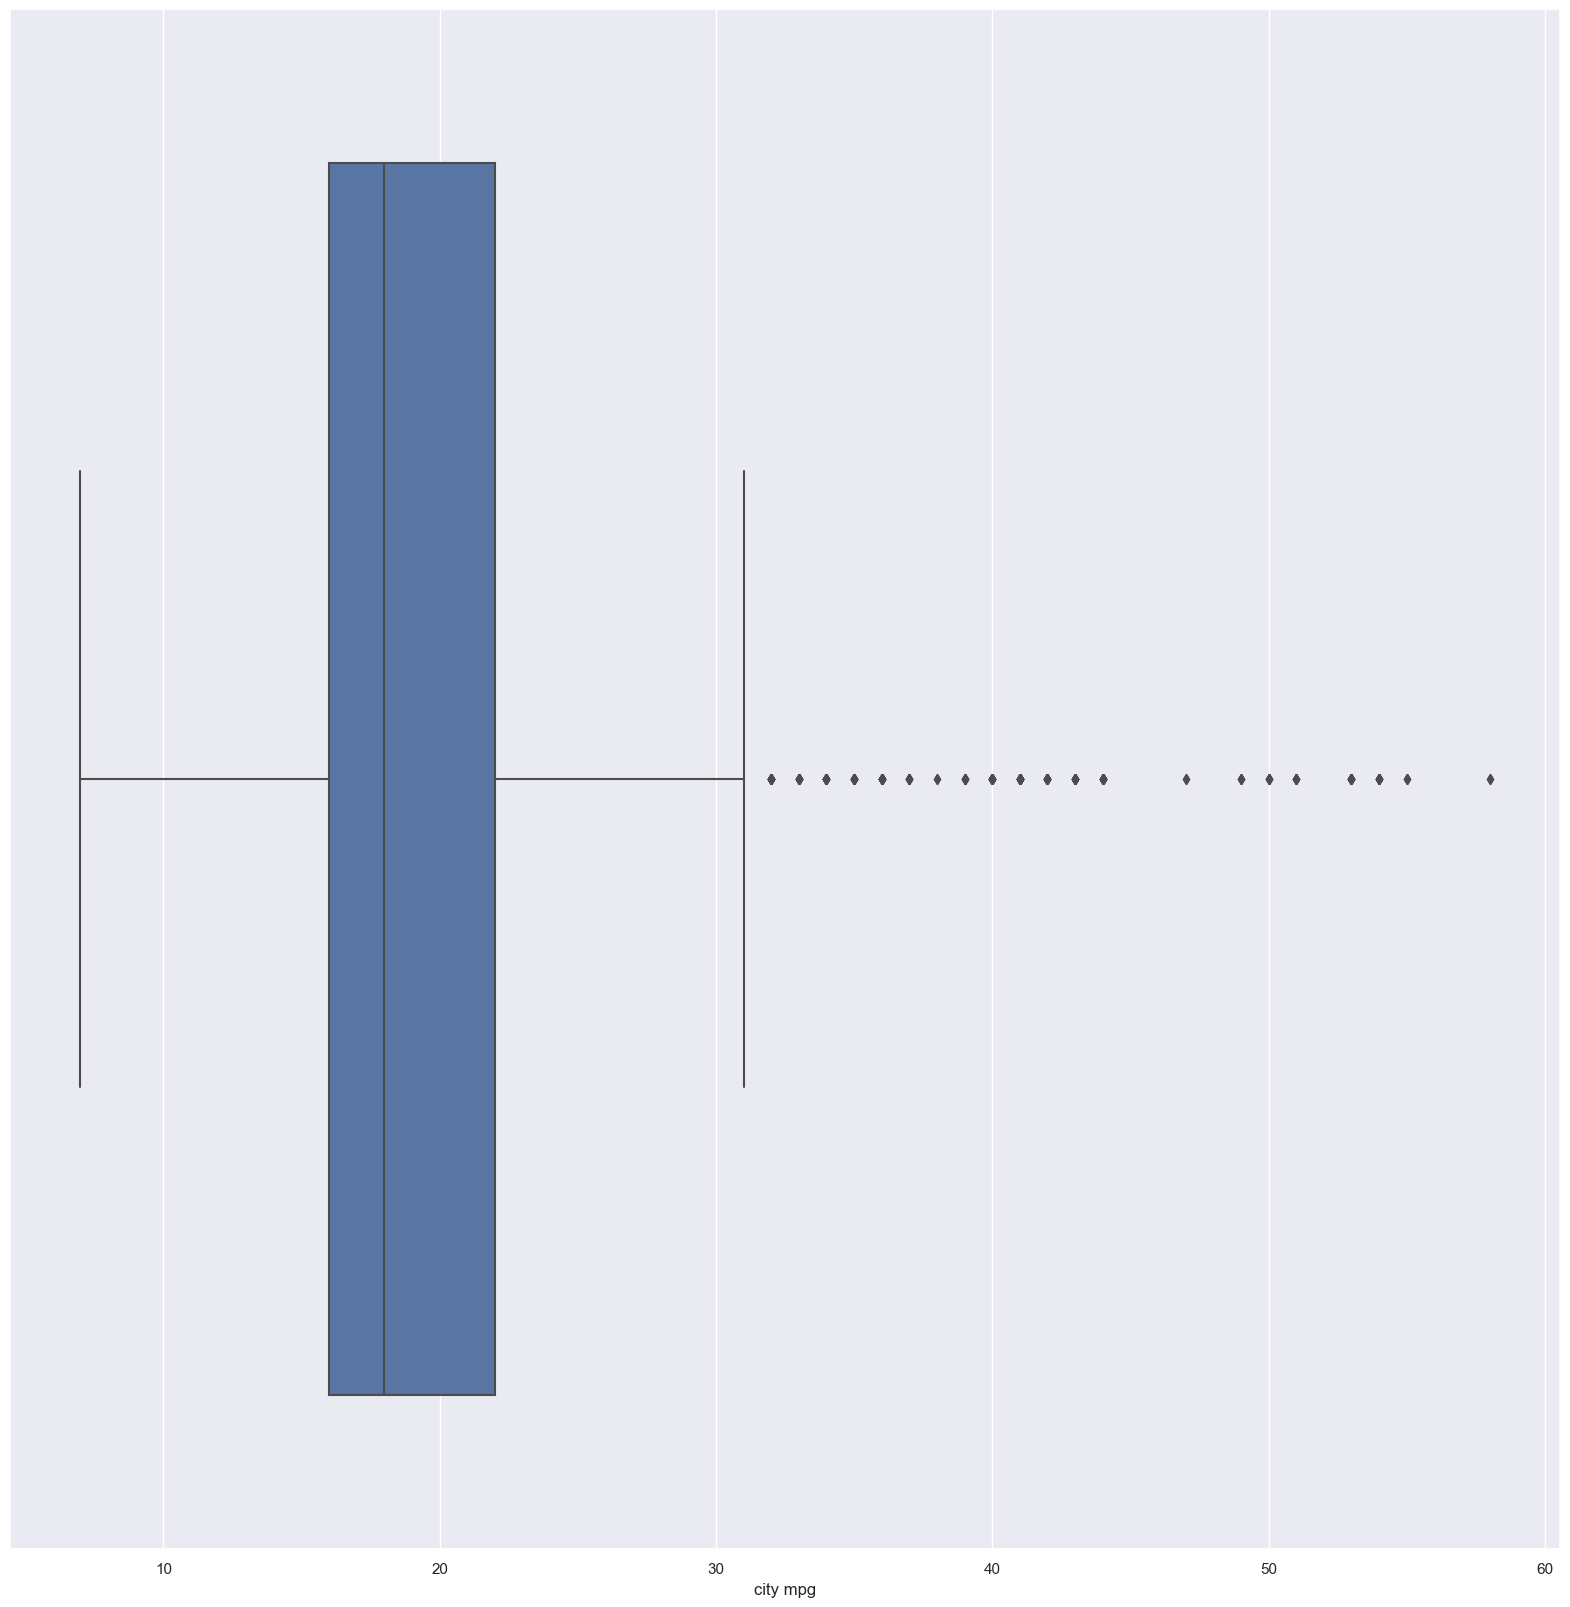

In [145]:
sns.boxplot(x = 'city mpg', data = data)


Checking the percentiles:

In [146]:
for i in range(90, 100):
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['city mpg'], i)))


The 90.0th percentile value is 26.00
The 91.0th percentile value is 26.00
The 92.0th percentile value is 27.00
The 93.0th percentile value is 27.00
The 94.0th percentile value is 28.00
The 95.0th percentile value is 29.00
The 96.0th percentile value is 30.00
The 97.0th percentile value is 31.00
The 98.0th percentile value is 32.00
The 99.0th percentile value is 41.00


We can see outliers in the 99.0th percentile.

In [147]:
for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['city mpg'], i)))

The 99.0th percentile value is 41.00
The 99.1th percentile value is 41.00
The 99.2th percentile value is 41.00
The 99.3th percentile value is 42.00
The 99.4th percentile value is 43.00
The 99.5th percentile value is 44.00
The 99.6th percentile value is 44.00
The 99.7th percentile value is 50.00
The 99.8th percentile value is 53.00
The 99.9th percentile value is 54.00


Our bar will be equal to 40:

In [148]:
data = data[data['city mpg'] < 40]


Once again we plot:

<AxesSubplot: xlabel='city mpg'>

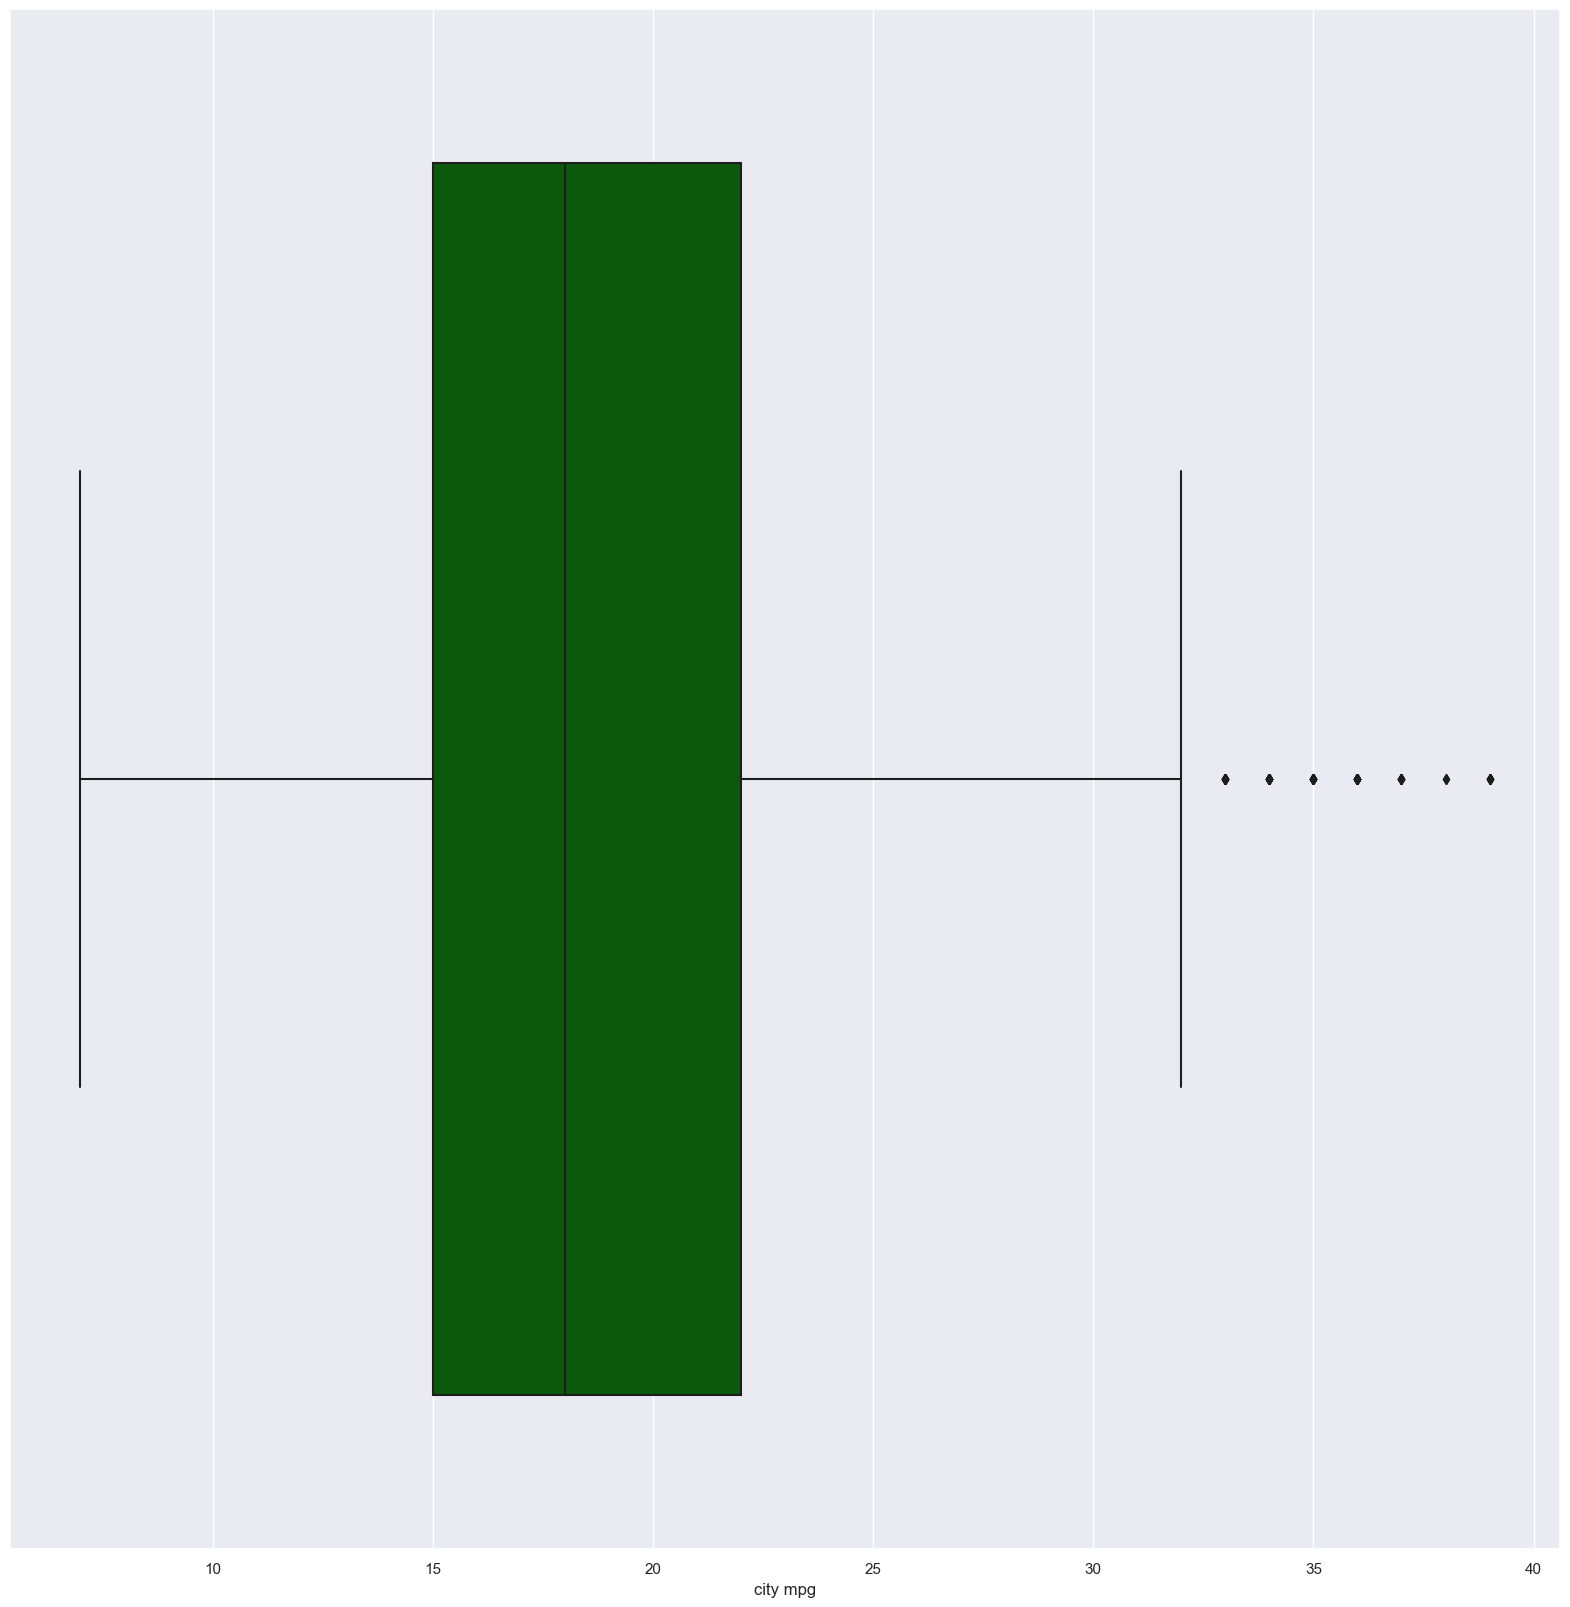

In [149]:
sns.boxplot(x = 'city mpg', data= data, color = 'darkgreen')


4. Boxplot of 'city mpg' adn 'highway MPG'

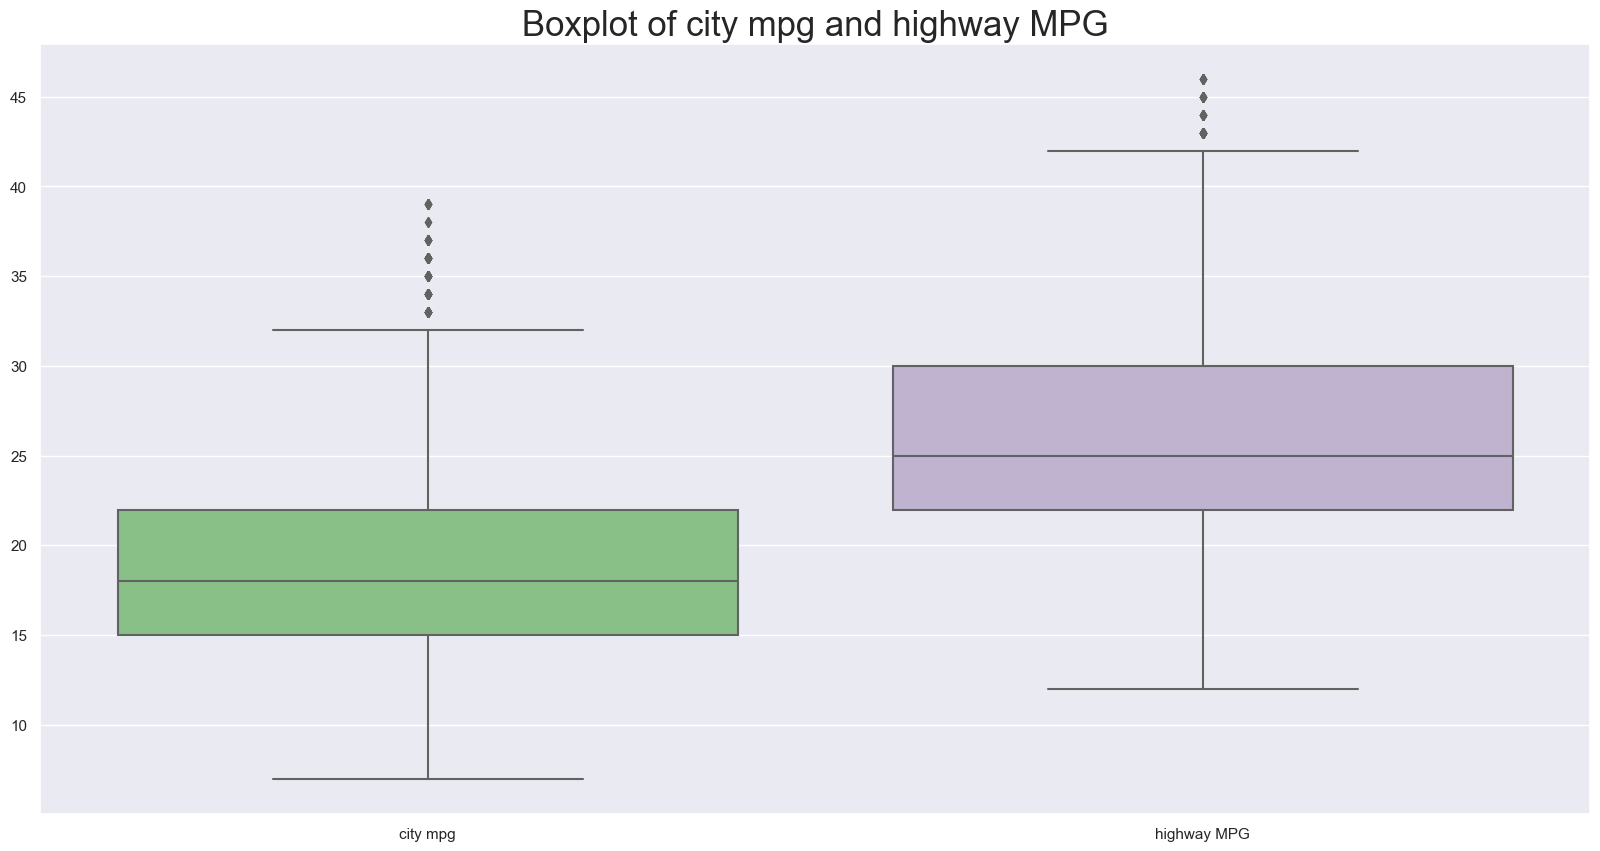

In [150]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = data[['city mpg', 'highway MPG']], palette = 'Accent')
plt.title("Boxplot of city mpg and highway MPG", fontsize = 25)
plt.show()

We can see that most city mpg values are in the range 15 to 22, and the values from highway mpg are approximately from 22 to 30.

5. Boxplot of 'Engine HP'

<AxesSubplot: >

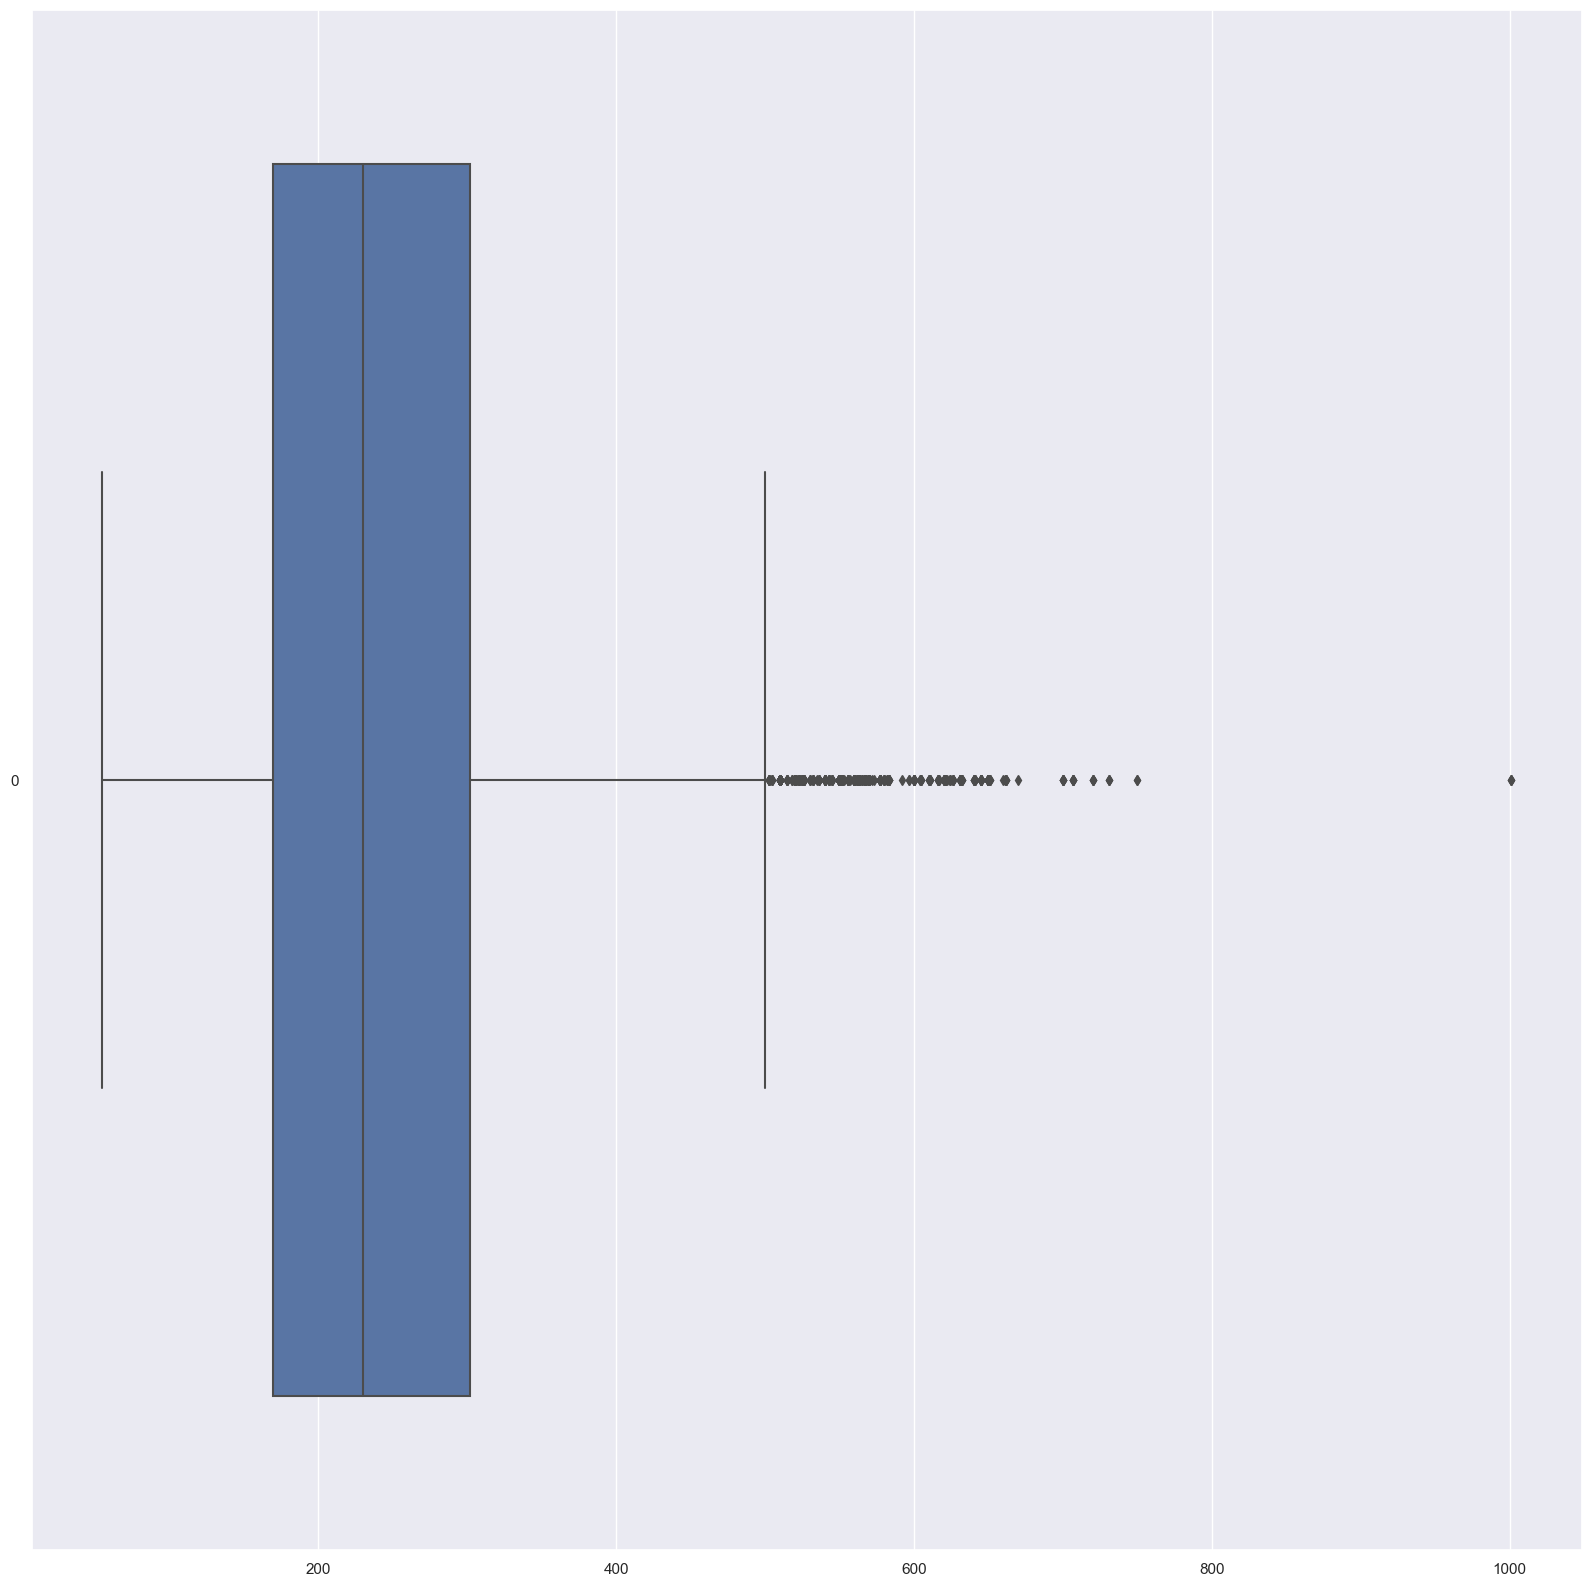

In [151]:
plt.Figure(figsize=(10,20))
sns.boxplot(data['Engine HP'], orient="h")

As we can observe, the plot is right skewed which means that most of the engine hp values are above the mean.

# Heatmaps:

For understanding the correlation between two entities

<AxesSubplot: >

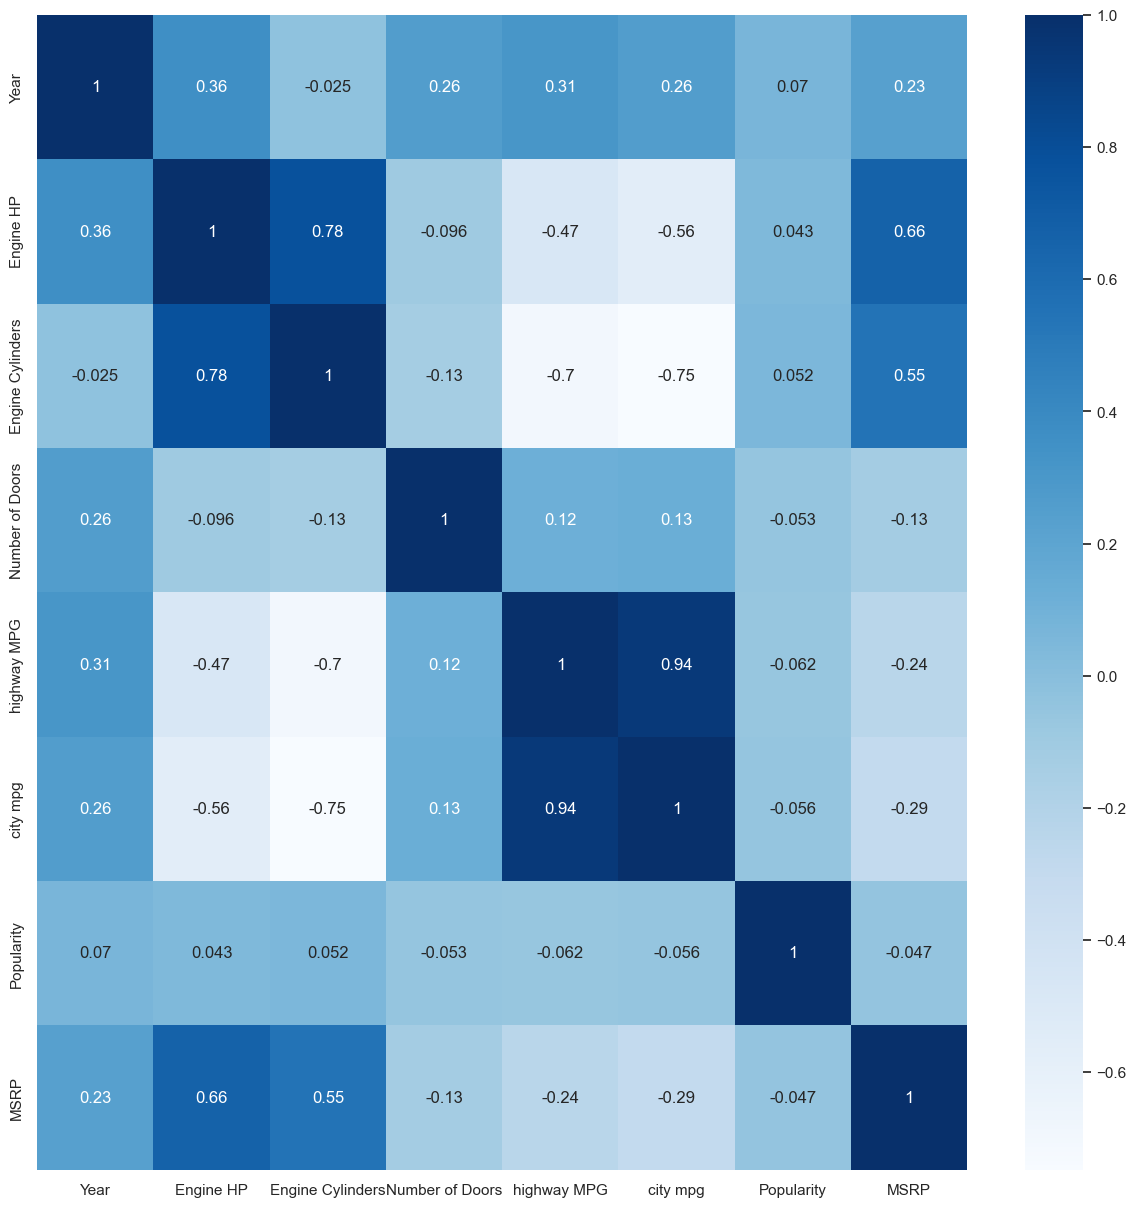

In [152]:
plt.figure(figsize = (15, 15))
numeric_columns = ['Make','Model','Year','Engine Fuel Type','Engine HP','Engine Cylinders','Transmission Type','Driven_Wheels','Number of Doors','Market Category','Vehicle Size','Vehicle Style','highway MPG','city mpg','Popularity','MSRP']
heatmap_data = data[numeric_columns].corr()

sns.heatmap(heatmap_data,cmap="Blues", annot = True)

We can see a correlation between city mpg and highway mpg in which th ecorrelation coefficient is 0.89, also enginge HP and engine cylinders with 0.78.

Correlation coefficient lies between the range -1 to 1. The higher correlation being 1.

# Implots

Help on checking the relationship between two parameters

1. Implot between 'city mpg' and 'Engine Cylinders'

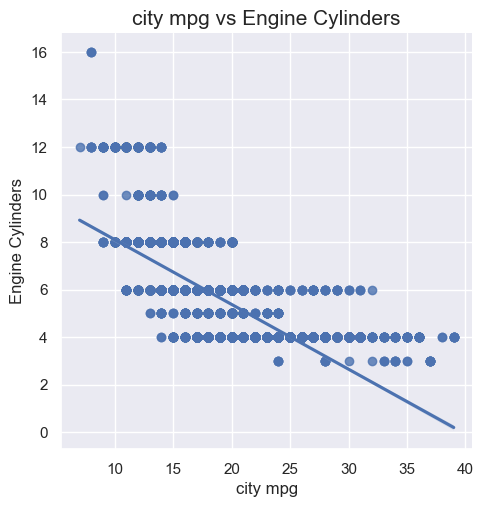

In [153]:
sns.lmplot(x = 'city mpg', y = 'Engine Cylinders', data = data)
plt.title("city mpg vs Engine Cylinders", fontsize = 15)
plt.show()

We see that there's an inverse relationship between city mpg and engine cylinders. This means that if there is an increase of the number of cylinders, the miles that the car moves per galon decreases.

2. Implot between 'city MPG' and 'highway MPG'

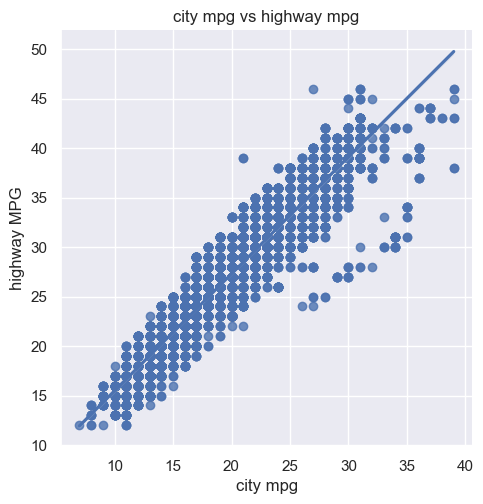

In [154]:
sns.lmplot(x = 'city mpg', y = 'highway MPG', data = data)
plt.title("city mpg vs highway mpg")
plt.show()

3. Implot between 'Engine Cylinders' and 'Engine HP'

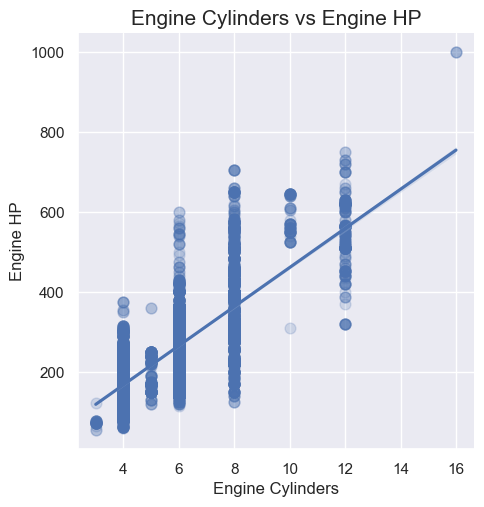

In [155]:
sns.lmplot(x = 'Engine Cylinders', y = 'Engine HP', scatter_kws = {"s": 60, "alpha": 0.2}, data = data)
plt.title("Engine Cylinders vs Engine HP", fontsize = 15)
plt.show()

4. Implot between 'Number of Doors' and 'Popularity'

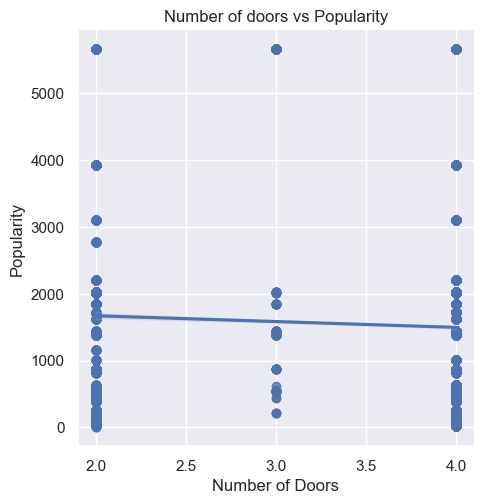

In [156]:
sns.lmplot(x = 'Number of Doors', y = 'Popularity', data = data)
plt.title("Number of doors vs Popularity")
plt.show()


There is a negative slope on the relationship between the parameters, which means, they are not related with eachother. This is the analysis of the data that we have, but doesn't mean it's the same in real life.

5. Implot between 'Engine HP' and 'Popularity'

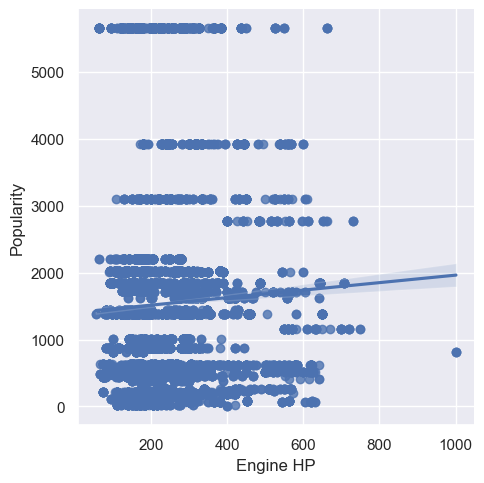

In [157]:
sns.set(rc = {'figure.figsize': (20, 20)})
sns.lmplot(x = 'Engine HP', y = 'Popularity', data = data)

We can see a positive slope that tells us that with the increase on engine HP, there's a chance of increase in polularity but there is not a relation between the parameters. Correlation is not always equal to causation.

# Grouping on the basis of 'Year'

We will get the mean of the 'highway MPG' per year in descending order. 

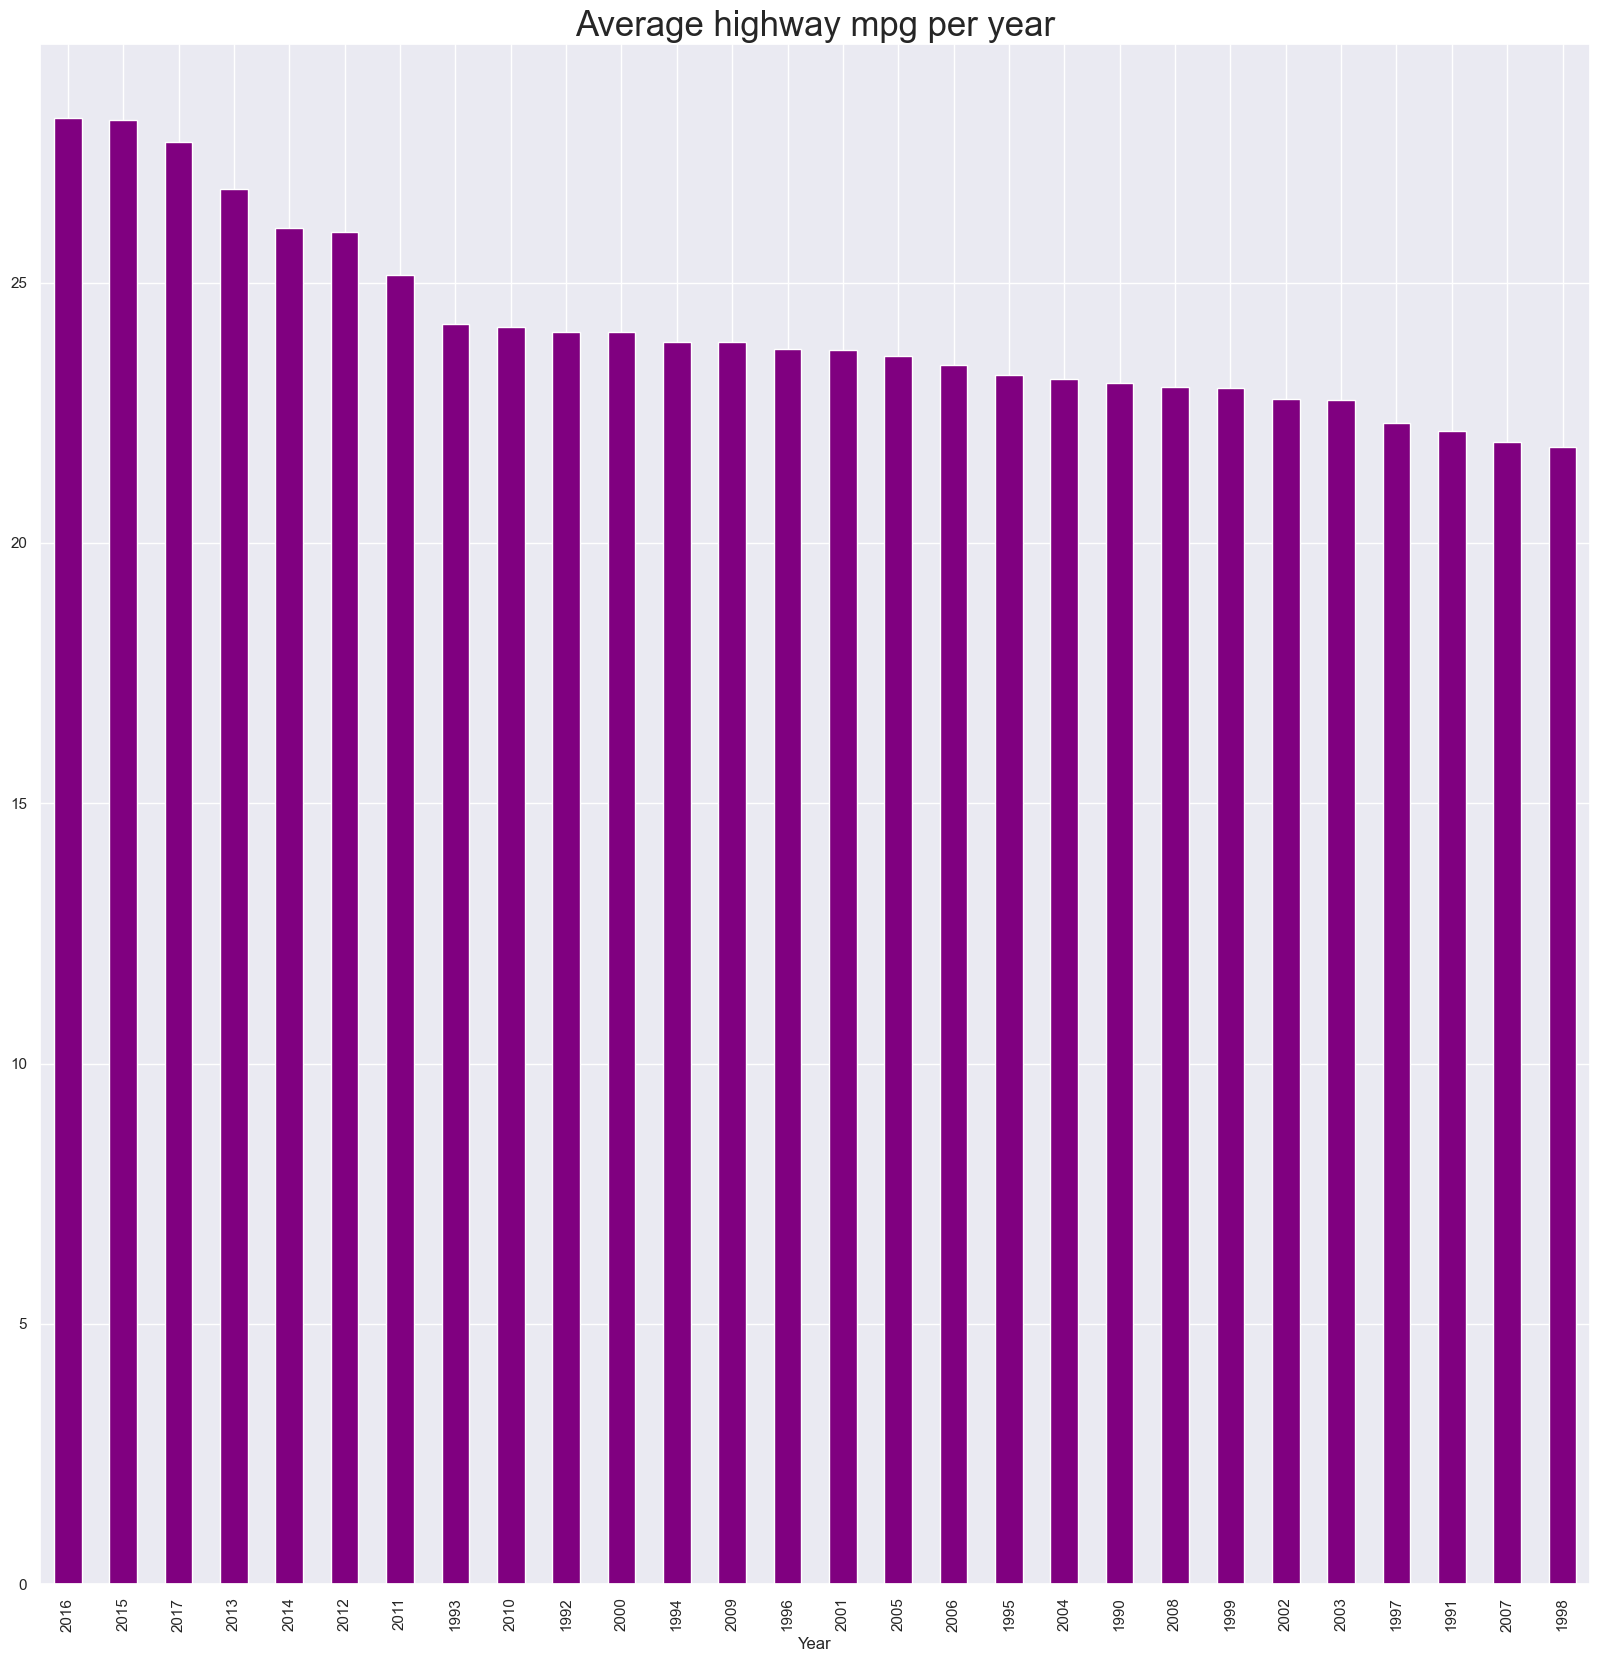

In [158]:
plt.Figure(figsize=(20,10))
data.groupby('Year').mean()['highway MPG'].sort_values(ascending = False).plot(kind = 'bar', color= 'purple')
plt.title("Average highway mpg per year", fontsize = 25)
plt.show()

# Creating a new column

We will add a new column to calculate the difference vetween the present year an the year on which the car war manufactured. This will be used to calculate the depreciation ammount using the machine learning model.

In [159]:
data['Present Year'] = 2023


Now we check the head of the dataframe.

In [160]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Present Year
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,2023
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,2023
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,2023
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,2023
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,2023


Now it's time to reate another column called 'Years of Manufacture' which will calculate how many years from the current year the car was manufactured.

In [161]:
data['Years Of Manufacture'] = data['Present Year'] - data['Year']


Once we have the information we need, theres no need to have an additional column called 'Present Year' as the value is constant. In that case we will drop the column.

In [162]:
data.drop(['Present Year'], inplace = True, axis = 1)


# Plotting the barlot of 'Years of manufacture'

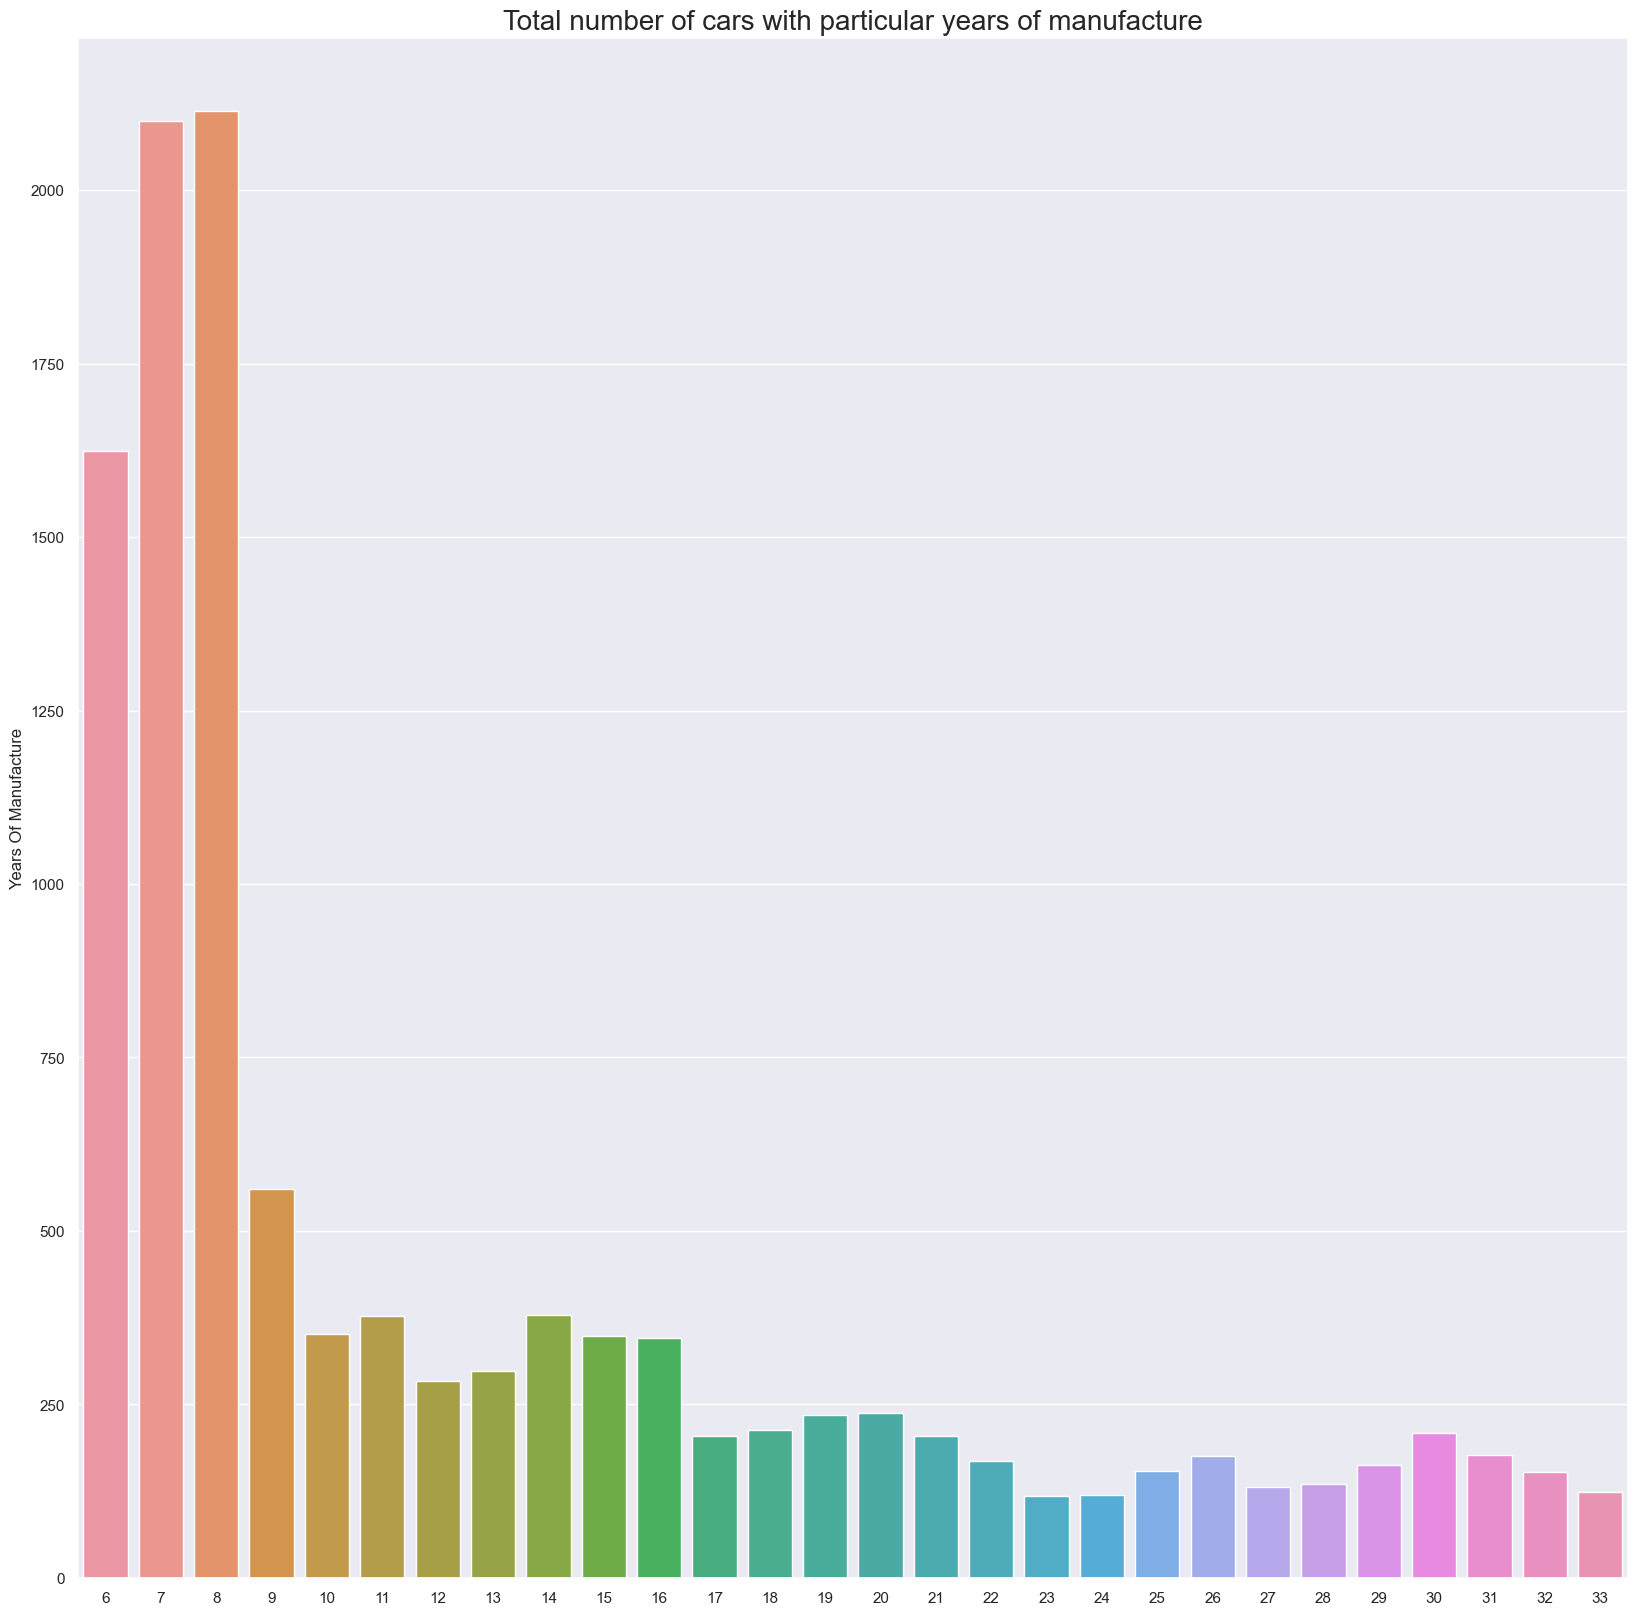

In [163]:
sns.barplot(y = data['Years Of Manufacture'].value_counts(), x = data['Years Of Manufacture'].value_counts().index)
plt.title("Total number of cars with particular years of manufacture", fontsize = 20)
plt.show()

# Dealing with missing and invalid data

1. Unique values in Engine Fuel Type

In [164]:
data['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'flex-fuel (premium unleaded recommended/E85)',
       'natural gas', 'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [165]:
type("data['Engine Fuel Type'].mode()")

str

In [166]:
data['Engine Fuel Type'].fillna("data['Engine Fuel Type'].mode()", inplace = True)


In [167]:
data['Engine Fuel Type'].isnull().sum()


0

In [168]:
data.isnull().sum()


Make                       0
Model                      0
Year                       0
Engine Fuel Type           0
Engine HP                 21
Engine Cylinders          20
Transmission Type          0
Driven_Wheels              0
Number of Doors            1
Market Category         3737
Vehicle Size               0
Vehicle Style              0
highway MPG                0
city mpg                   0
Popularity                 0
MSRP                       0
Years Of Manufacture       0
dtype: int64

2. Calculating the mean value of Engine Hp to understand it better.

In [169]:
data['Engine HP'].mean()

250.75316672372475

Median value of Engine HP

In [170]:
data['Engine HP'].median()

230.0

Now, we are going to fill the missing values with the median value so that it is more appreopiate and accurate. inplace = True means that the values are being replaced permamently.

In [171]:
data['Engine HP'].fillna(data['Engine HP'].median(), inplace = True)


Now we check the missing values in Engine HP.

In [172]:
data['Engine HP'].isnull().sum()


0

3. We now check Engine Cylinders to see if there are some missing or not valid values. If we do not replace these values, the machine learning model could lead to some errors or it could not perform.

In [173]:
data['Engine Cylinders'].unique()

array([ 6.,  4.,  5.,  8., 12., 10.,  3., nan, 16.])

We see that there is a 'nan' value that must be replaced.

In [174]:
data['Engine Cylinders'].fillna(4, inplace = True)

Checking again:

In [175]:
data['Engine Cylinders'].unique()

array([ 6.,  4.,  5.,  8., 12., 10.,  3., 16.])

Once again we check for null values in all the data:

In [176]:
data.isnull().sum()


Make                       0
Model                      0
Year                       0
Engine Fuel Type           0
Engine HP                  0
Engine Cylinders           0
Transmission Type          0
Driven_Wheels              0
Number of Doors            1
Market Category         3737
Vehicle Size               0
Vehicle Style              0
highway MPG                0
city mpg                   0
Popularity                 0
MSRP                       0
Years Of Manufacture       0
dtype: int64

4. Since Market Category has many missing values, we will be dropping it.

In [177]:
data.drop(['Market Category'], inplace=True, axis=1)

Checking again:

In [178]:
data.isnull().sum()


Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         1
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
Years Of Manufacture    0
dtype: int64

5. Now we can see that there are missing values in Number of Doors:

We will be adding the missing value using the median value.

In [179]:
data['Number of Doors'].median()


4.0

In [180]:
data['Number of Doors'].fillna(4.0, inplace = True)


Checking again:

In [181]:
data['Number of Doors'].isnull().sum()


0

# **Data Manipulation**

In order to feed the machine learning model, we need to manipulate the data. Also, there is a requirement to enconde the text information so that the values are converted to mathematical vectors so that they can be understod by the algorithms.

**Data Pre-processing**:

Pre-processing refers to the transformations applied to our data before feeding it to the algorithm. It is a technique used to convert the raw data into a clean set, that way it becomes feasible for the analysis.

Data process:

Raw data -> Structure data -> Data Pre-processing -> Exploration Data Analysis -> Insight, Reports, Visual Graphs

1. Shuffling the data

In [182]:
shuffled_data = shuffle(data, random_state=100)
X = shuffled_data.drop(['MSRP'], axis = 1)
y = shuffled_data['MSRP']

2. Dividing the data intro training and testing sets

We will be dividing randomly the data  so that the test set just contains 20 percent of the values.

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 1000)


To se how the values are divided:

In [184]:
print("The size of the input train data is: {}".format(X_train.shape))
print("The size of the output train data is: {}".format(y_train.shape))
print("The size of the input test data is: {}".format(X_test.shape))
print("The size of the output test data is: {}".format(y_test.shape))

The size of the input train data is: (9364, 15)
The size of the output train data is: (9364,)
The size of the input test data is: (2341, 15)
The size of the output test data is: (2341,)


3. Encoding the data

It is important to encode the data so that er eould be able to convert the data from categorical to mathematical.
There are different encoding techniques that we would be taking into consideration to maje sure we get the best output values.

In [185]:
encoder = TargetEncoder(cols='Year')

In [186]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
4875,Kia,Forte,2016,regular unleaded,145.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,26,1720,7
5936,Acura,Integra,2001,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,2.0,Compact,2dr Hatchback,28,21,204,22
9217,Toyota,Sienna,2015,regular unleaded,266.0,6.0,AUTOMATIC,front wheel drive,4.0,Large,Passenger Minivan,25,18,2031,8
2391,Porsche,Cayman,2016,premium unleaded (required),340.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,1715,7
2857,Bentley,Continental GT Speed,2014,flex-fuel (premium unleaded required/E85),616.0,12.0,AUTOMATIC,all wheel drive,2.0,Midsize,Coupe,20,13,520,9


We do the target encoding here where we would replace the values with the average values of the 'MSRP' whenever we find a value associated with it. This makes it easier for the machine learning model as we are already giving the output values to it so that there is no need to encode further.

In [187]:
encoder.fit(X_train['Year'], y_train.to_frame()['MSRP'] )


TargetEncoder(cols=['Year'])

We now transform the value to convert the column so that we get the most desired output.

In [188]:
X_train['Year'] = encoder.transform(X_train['Year'])


***Note: we should only be transforming the data from the training set. Not the test values.***

In [189]:
X_test['Year'] = encoder.transform(X_test['Year'])

In [190]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
4875,Kia,Forte,47179.747909,regular unleaded,145.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,26,1720,7
5936,Acura,Integra,36463.710855,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,2.0,Compact,2dr Hatchback,28,21,204,22
9217,Toyota,Sienna,46039.113984,regular unleaded,266.0,6.0,AUTOMATIC,front wheel drive,4.0,Large,Passenger Minivan,25,18,2031,8
2391,Porsche,Cayman,47179.747909,premium unleaded (required),340.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,1715,7
2857,Bentley,Continental GT Speed,65944.511013,flex-fuel (premium unleaded required/E85),616.0,12.0,AUTOMATIC,all wheel drive,2.0,Midsize,Coupe,20,13,520,9


We will be doing the same for the other models.

In [191]:
encoder = TargetEncoder(cols = 'Model')
encoder.fit(X_train['Model'], y_train.to_frame()['MSRP'])
X_train['Model'] = encoder.transform(X_train['Model'])
X_test['Model'] = encoder.transform(X_test['Model'])


In [192]:
X_train.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
4875,Kia,31251.777503,47179.747909,regular unleaded,145.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,26,1720,7
5936,Acura,25961.334964,36463.710855,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,2.0,Compact,2dr Hatchback,28,21,204,22
9217,Toyota,38348.961942,46039.113984,regular unleaded,266.0,6.0,AUTOMATIC,front wheel drive,4.0,Large,Passenger Minivan,25,18,2031,8
2391,Porsche,44682.312119,47179.747909,premium unleaded (required),340.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,1715,7
2857,Bentley,64726.731673,65944.511013,flex-fuel (premium unleaded required/E85),616.0,12.0,AUTOMATIC,all wheel drive,2.0,Midsize,Coupe,20,13,520,9


In [193]:
encoder = TargetEncoder(cols='Make')
encoder.fit(X_train['Make'], y_train.to_frame()['MSRP'])
X_train['Make'] = encoder.transform(X_train['Make'])
X_test['Make']= encoder.transform(X_test['Make'])

In [194]:
X_train["Engine Fuel Type"].unique()

array(['regular unleaded', 'premium unleaded (required)',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/E85)', 'premium unleaded (recommended)',
       'diesel', 'natural gas',
       'flex-fuel (premium unleaded recommended/E85)',
       'flex-fuel (unleaded/natural gas)',
       "data['Engine Fuel Type'].mode()"], dtype=object)

In [195]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
4875,24729.504771,31251.777503,47179.747909,regular unleaded,145.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,26,1720,7
5936,34675.174805,25961.334964,36463.710855,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,2.0,Compact,2dr Hatchback,28,21,204,22
9217,28766.096085,38348.961942,46039.113984,regular unleaded,266.0,6.0,AUTOMATIC,front wheel drive,4.0,Large,Passenger Minivan,25,18,2031,8
2391,102737.754118,44682.312119,47179.747909,premium unleaded (required),340.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,1715,7
2857,243014.334260,64726.731673,65944.511013,flex-fuel (premium unleaded required/E85),616.0,12.0,AUTOMATIC,all wheel drive,2.0,Midsize,Coupe,20,13,520,9


# One Hot encoding

Is a representation of categorical variables as binary vectors. 
This first requires that the categorical values be mapped to integer values.
Then each integer value is represented as a binaty vector that is all zero values excelt the index of the integer, which is marked with a 1

In [196]:
encoder = OneHotEncoder()
encoder.fit(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_train = encoder.transform(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_test = encoder.transform(X_test[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])



We have to concetenate the features with the X_train and X_test and remove the actual categorical features to be able to give them to machine learning algorithms.

In [197]:
X_train = pd.concat([X_train, one_hot_encoded_output_train], axis = 1)
X_test = pd.concat([X_test, one_hot_encoded_output_test], axis = 1)


In [198]:
X_train.drop(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'], axis = 1, inplace = True)
X_test.drop(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'], axis = 1, inplace = True)

Checking the info of the data:

In [199]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9364 entries, 4875 to 8005
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  9364 non-null   float64
 1   Model                 9364 non-null   float64
 2   Year                  9364 non-null   float64
 3   Engine HP             9364 non-null   float64
 4   Engine Cylinders      9364 non-null   float64
 5   Number of Doors       9364 non-null   float64
 6   highway MPG           9364 non-null   int64  
 7   city mpg              9364 non-null   int64  
 8   Popularity            9364 non-null   int64  
 9   Years Of Manufacture  9364 non-null   int64  
 10  Engine Fuel Type_1    9364 non-null   int64  
 11  Engine Fuel Type_2    9364 non-null   int64  
 12  Engine Fuel Type_3    9364 non-null   int64  
 13  Engine Fuel Type_4    9364 non-null   int64  
 14  Engine Fuel Type_5    9364 non-null   int64  
 15  Engine Fuel Type_6

We can see that there are only float and int values, so we can give this to the ML algorithm for implementation.

# Standarization and Normalization of the data

Before passing the data to the model, we need to normalize and standarize the data.

**When to normalize the data?**

It is required to normalize the data when the data distribution is unknown or the data does't have Gaussian Distribution.
This type of scaling technique is used when the data has a diversified scope and the algorithms on which the data are being trained do not make pres

**When to standardize data?**

When data is being used for multivariate analysis i.e. when we want all the variables of comparable units.
his technique comes in handy when the data has varying ratios and the algorithms used, make assumptions about the data distribution like Logistic Regression, Linear Discriminant Analysis, etc.

**Normalized data vs standardized data**

- Normalization is used when the data doesn't have Gaussian distribution whereas Standardization is used on data having Gaussian distribution.


- Normalization scales in a range of [0,1] or [-1,1]. Standardization is not bounded by range.

- Normalization is highly affected by outliers. Standardization is slightly affected by outliers.

- Normalization is considered when the algorithms do not make assumptions about the data distribution. Standardization is used when algorithms make assumptions about the data distribution.

In [200]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)


In [201]:
X_train_new.shape


(9364, 47)

In [202]:
error_mean_square = []
error_mean_absolute = []

# MACHINE LEARNING ANALYSIS

1. Linear regression

One of the best ways for predicting the regression values or the continuous output is to use linear regression. We have to first give the training data including the training output.

First, we have to fit the model with the data and understand the parameters. After that, we traun the model using the machine learning predictions to get the output.

After that, we compare the values from the actual values with the predicted values to get the output.


In [203]:
model = LinearRegression()
model.fit(X_train_new, y_train)


LinearRegression()

Here, we use predict function to predict the test set values and store tose values in y_predict which would later be used for comparison.

In [204]:
y_predict = model.predict(X_test_new)


We now store the results in error_mean_square and error_mean_absolute as they are lists. Later, we will plot the outputs and see how well the machine learning models did in the test set.

In [205]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [206]:
error_mean_absolute

[14662]

We will do an interesting thing, create a dataframe containing the predicted values and the actual values and draw a plot so that we can see how the output is actually different from the predictions.

In [207]:
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])


Now we'll look at the datahead


In [208]:
y_predict.head()

,Predicted Output
0,26880.0
1,33408.0
2,95872.0
3,22656.0
4,35840.0


We will also take the testing set values and see their values.

In [209]:
y_test.to_frame().head()

,MSRP
9866,19400
4691,6175
3702,68700
2403,34275
4544,42425


Here, we will be concatenating the y_predict values and the y_test values to see how well the machine learning models perform.

In [210]:
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)


Now, we can see the output:

In [211]:
results.head()


,Predicted Output,MSRP
0,26880.0,19400
1,33408.0,6175
2,95872.0,68700
3,22656.0,34275
4,35840.0,42425


**Regplot for linear Regression Output**

We'll be using seeaborn's regplot to better understand how the data is spread.

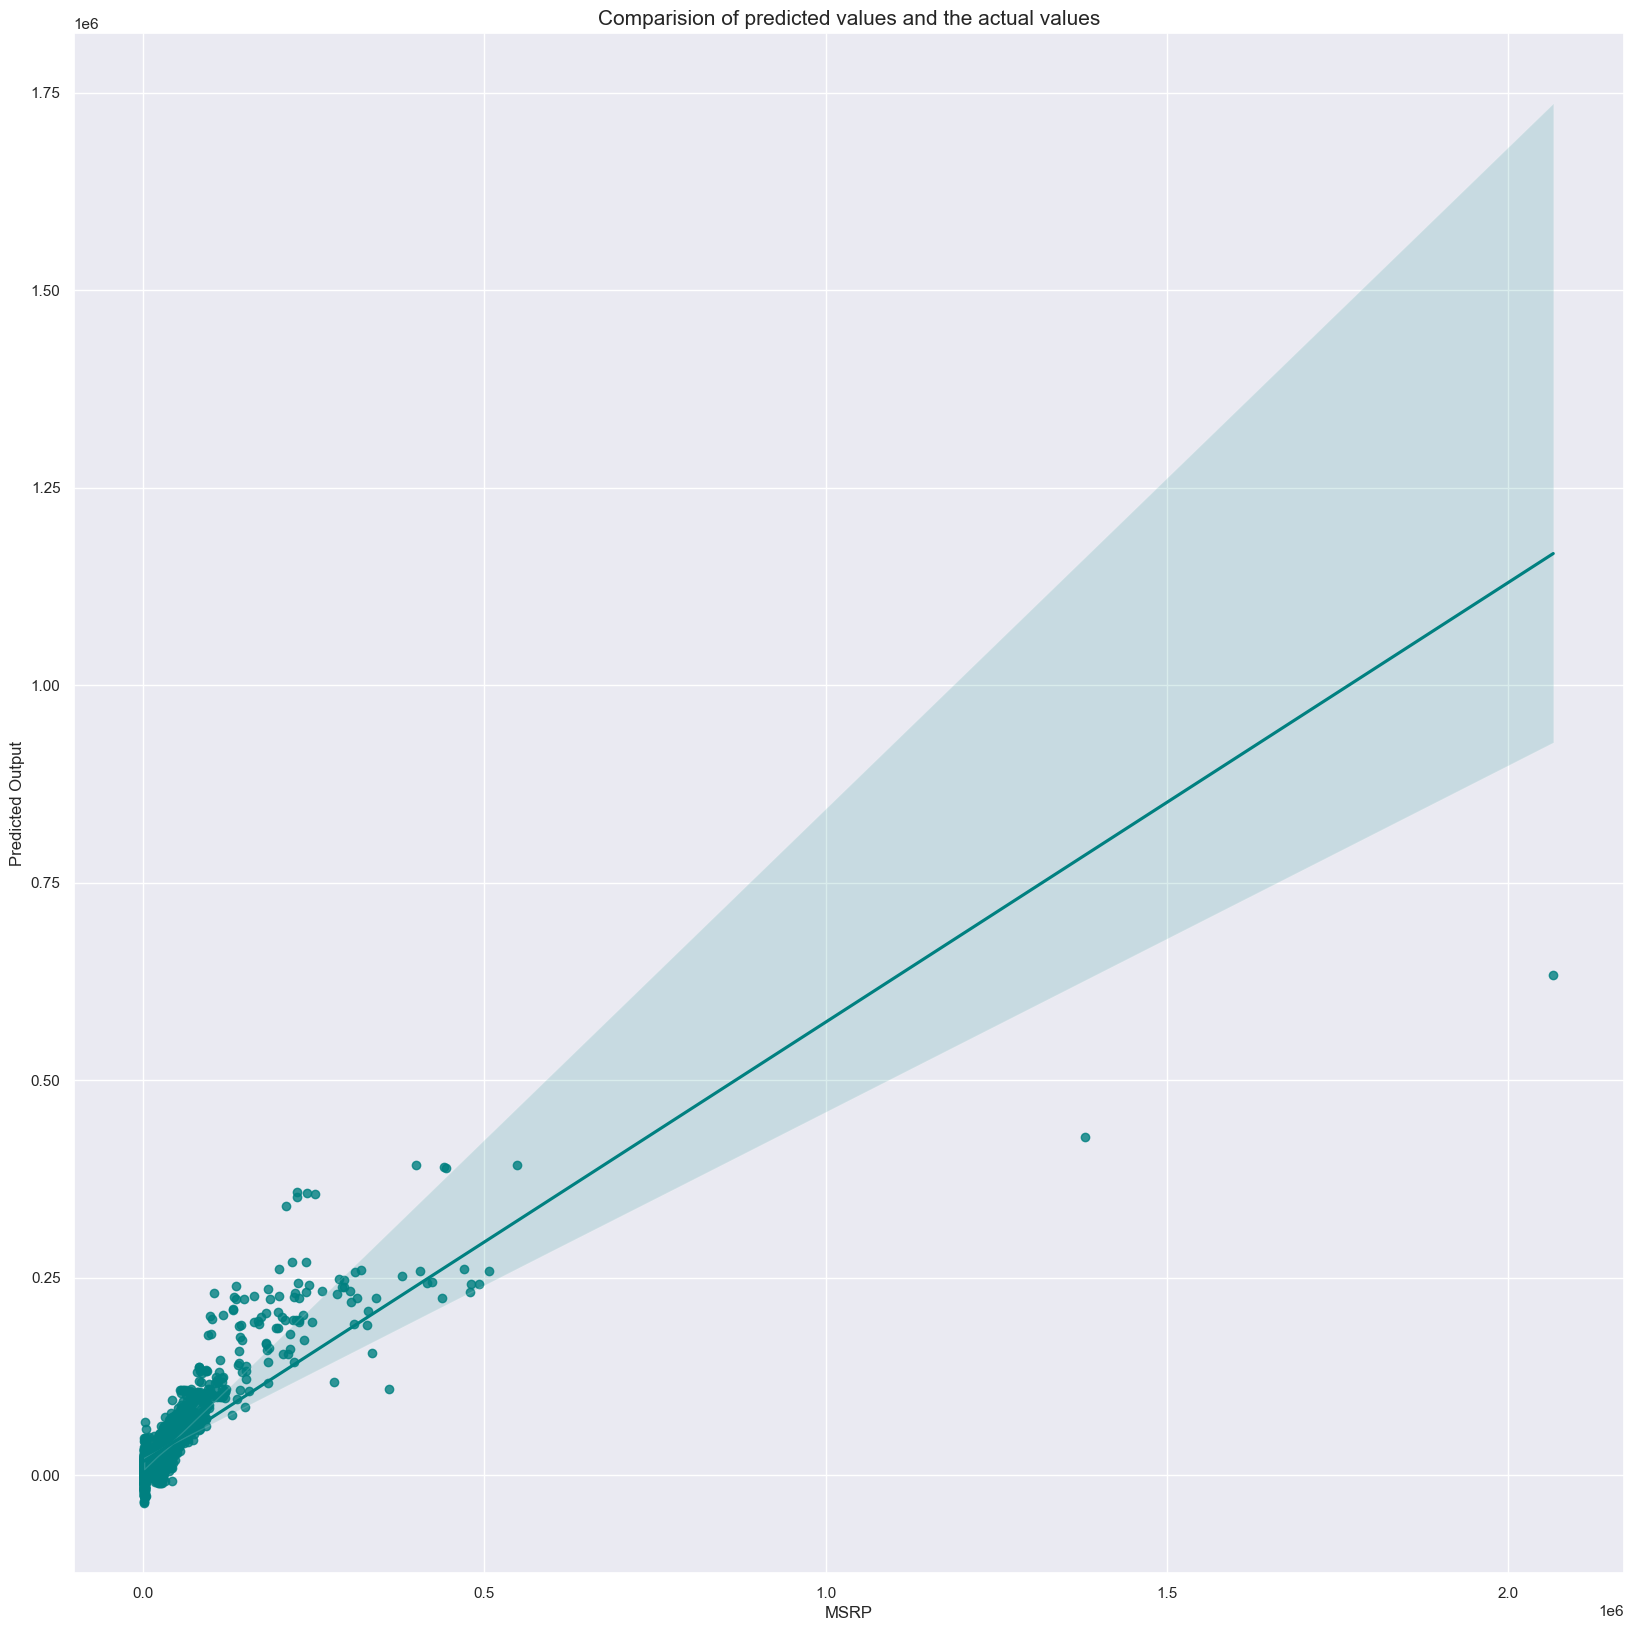

In [212]:
plt.Figure(figsize= (10,10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'teal', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 15)
plt.show()


We can see from the plot that the predictions are vety close to the actual values, therefore, the linear regression model did a good job.

Next, well test some other models to find out which is better for car price prediction.

2. Support Vector Regressor


In [213]:
model = SVR()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)
#reset_index will delete the index instead of inserting it back into the columms of the DataFrame.

**Regplot for Support Vector Regressor**

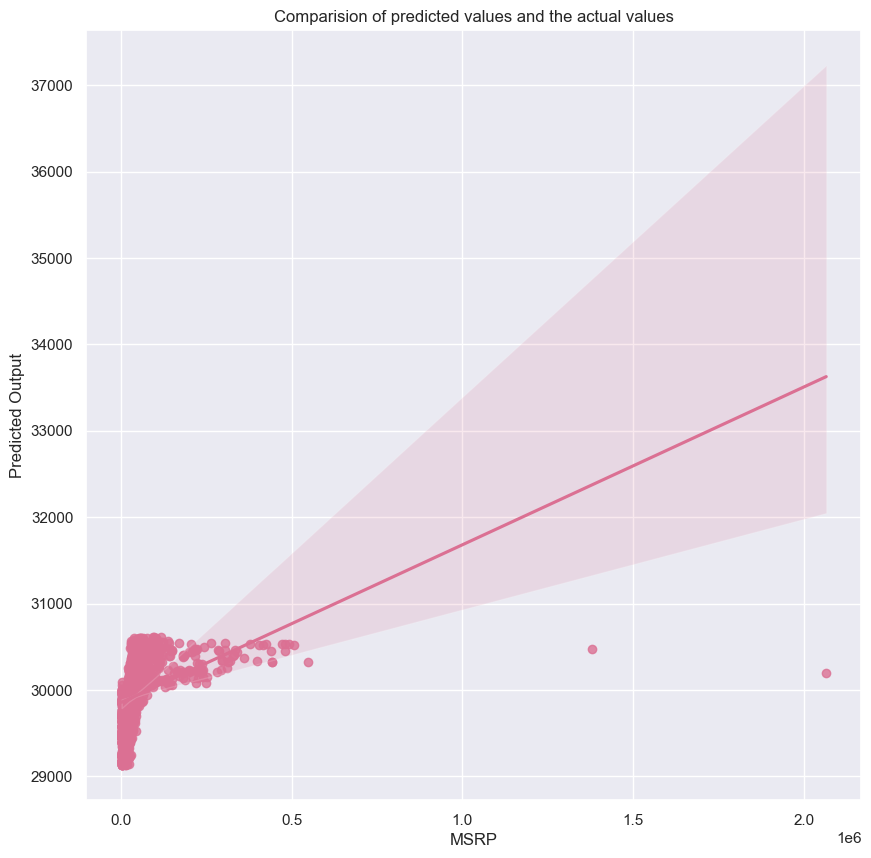

In [214]:
plt.figure(figsize=(10,10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'palevioletred', marker = 'o')
plt.title("Comparision of predicted values and the actual values")
plt.show()


We will be appending those values of the metrics and store them in a list for plotting later


In [215]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict,y_test)))

**3. Neighbors Regressor**

We will get the knn regressor and understand the output. Wi will draw a regplot to get a better understanding of how the data is spread out.

In [216]:
model = KNeighborsRegressor(n_neighbors= 2)
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict,columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)


**Regplot for K - Neighbors Regressor**

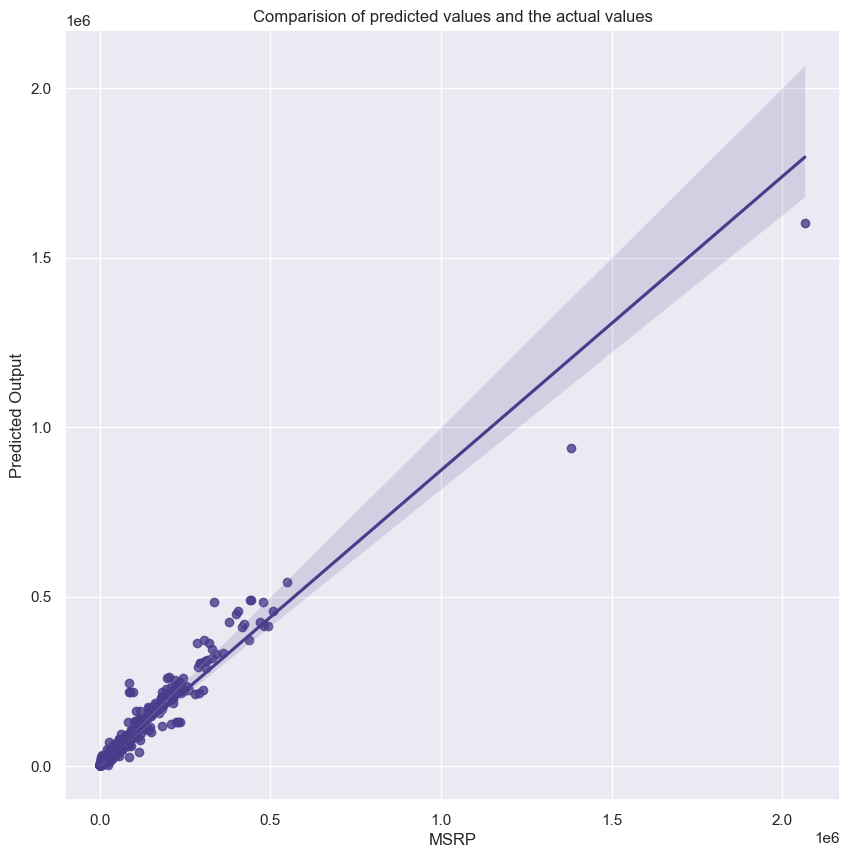

In [217]:
plt.figure(figsize = (10,10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'darkslateblue', marker = 'o')
plt.title("Comparision of predicted values and the actual values")
plt.show()


Now, we'll be storing the values in a list.

In [218]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))


**4. PLS Regression**

In [219]:
model = PLSRegression(n_components = 20)
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

**Regplot for PLS Regression**

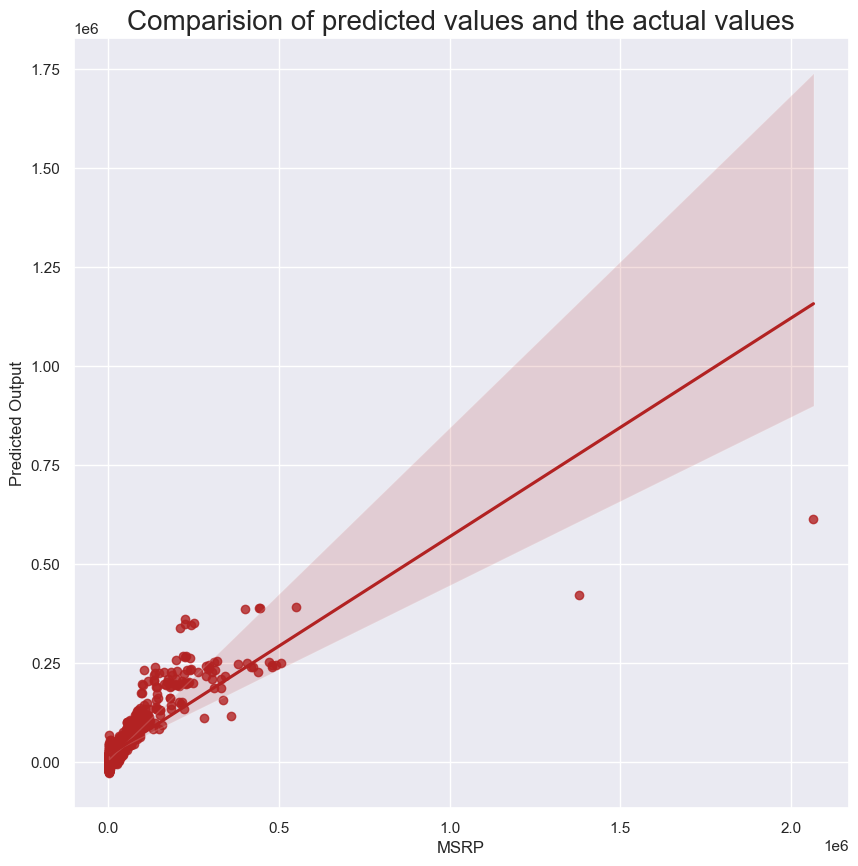

In [220]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'firebrick', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

We now append the values to the list:

In [221]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))


**5. Decision Tree Regressor**

In [222]:
model = DecisionTreeRegressor(splitter = 'random')
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns=['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)


**Regplot for Decision Tree regressor**

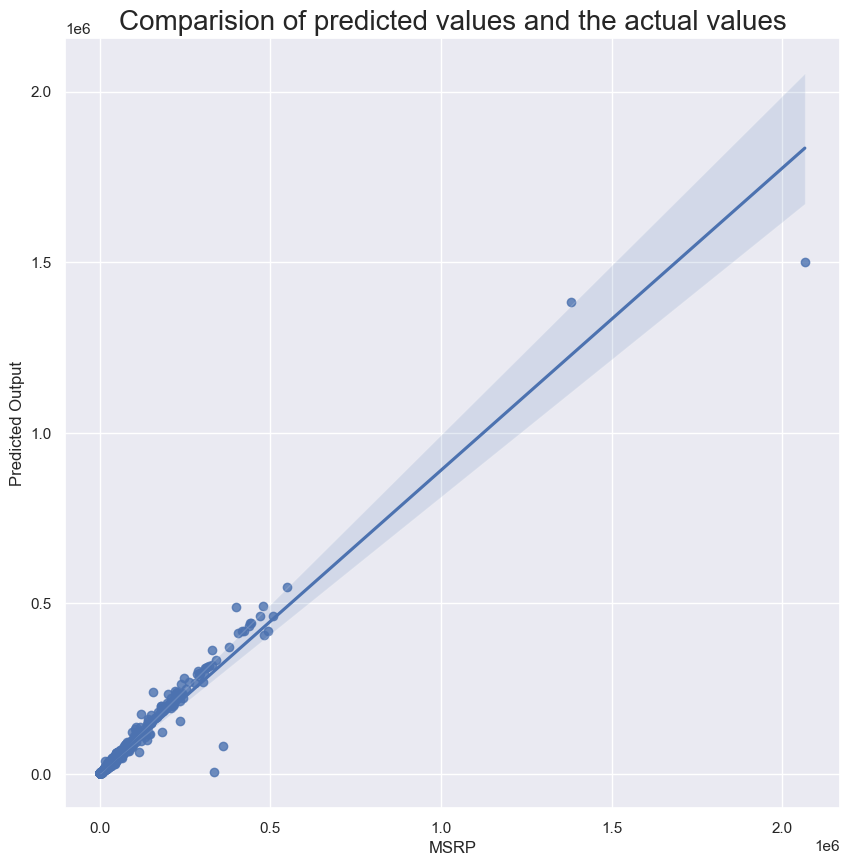

In [223]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

Appending the values to the list:

In [224]:
error_mean_square.append(int(mean_squared_error(y_predict,y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))


**6. Gradient Boosting Regressor**

There can be a few hyperparameters that we would need to tune. But we will see how the model performs with it's default values.

In [225]:
model = GradientBoostingRegressor()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)


**Regplot of Gradient Boosting Regresor**

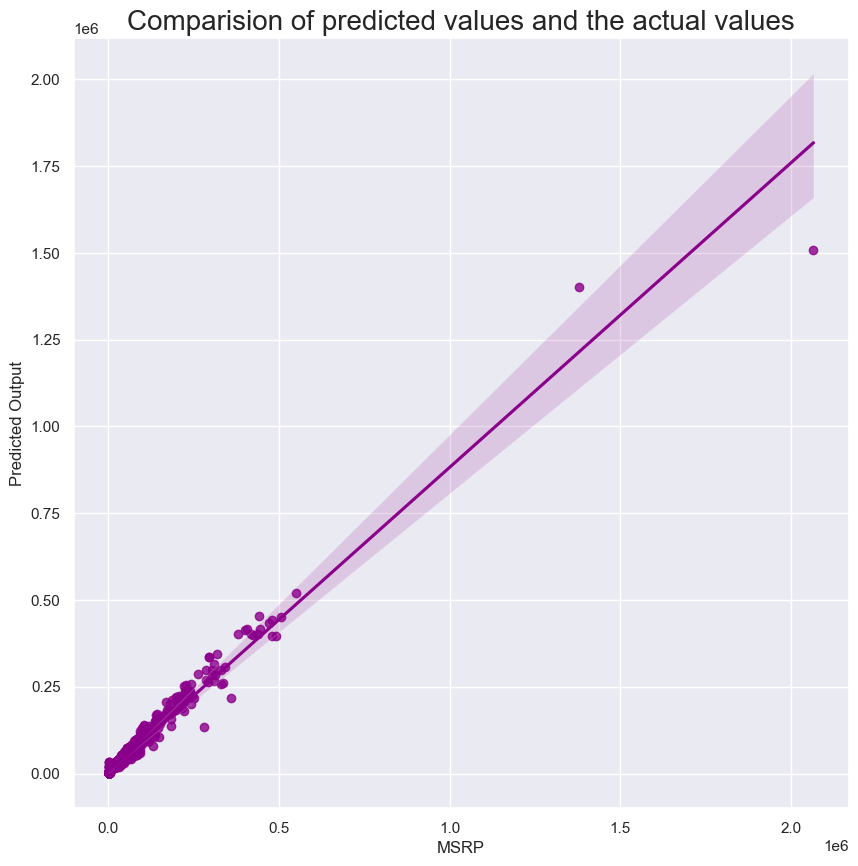

In [226]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'darkmagenta', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

Appending the values to the list:

In [227]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

**7. MLP Regressor**

MLP is a neural network for predictions. We will be taking into account 50 hidden layers with an alpha value equal to 0.001. We have different types of learning rates that we could use, but we will stick to 'adaptive'.

In [228]:
model = MLPRegressor(hidden_layer_sizes = 50, alpha = 0.001, solver = 'lbfgs', learning_rate = 'adaptive')
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)


**Regplot of MLP Regressor**

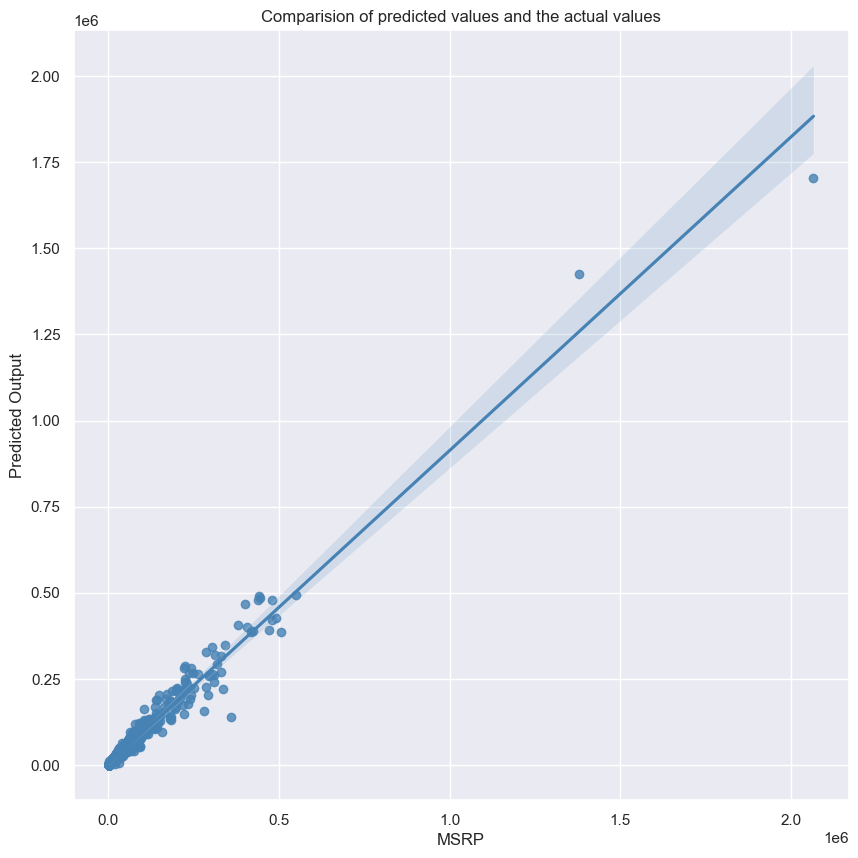

In [229]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'steelblue', marker = 'o')
plt.title("Comparision of predicted values and the actual values")
plt.show()

Appending the values to the list:

In [230]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))


# DataFrame of machine learning models

We will use the models that we created and making a dataframe. 

In [231]:
data = {'Models': ['Linear Regression', 'Support Vector Regressor', 'K Nearest Regressor', 'PLS Regression', 'Decision Tree Regressor', 'Gradient Boosting Regressor', 'MLP Regressor'], 'Mean Absolute Error': error_mean_absolute, 'Mean Squared Error': error_mean_square}
model_dataframe = pd.DataFrame(data)


In [232]:
model_dataframe

,Models,Mean Absolute Error,Mean Squared Error
0,Linear Regression,14662,1851175155
1,Support Vector Regressor,24417,5377788311
2,K Nearest Regressor,4880,308566859
3,PLS Regression,12928,1832640750
4,Decision Tree Regressor,3435,254936275
5,Gradient Boosting Regressor,4616,211959638
6,MLP Regressor,5322,181924043


**Barplot of ML models with mean absolute error**

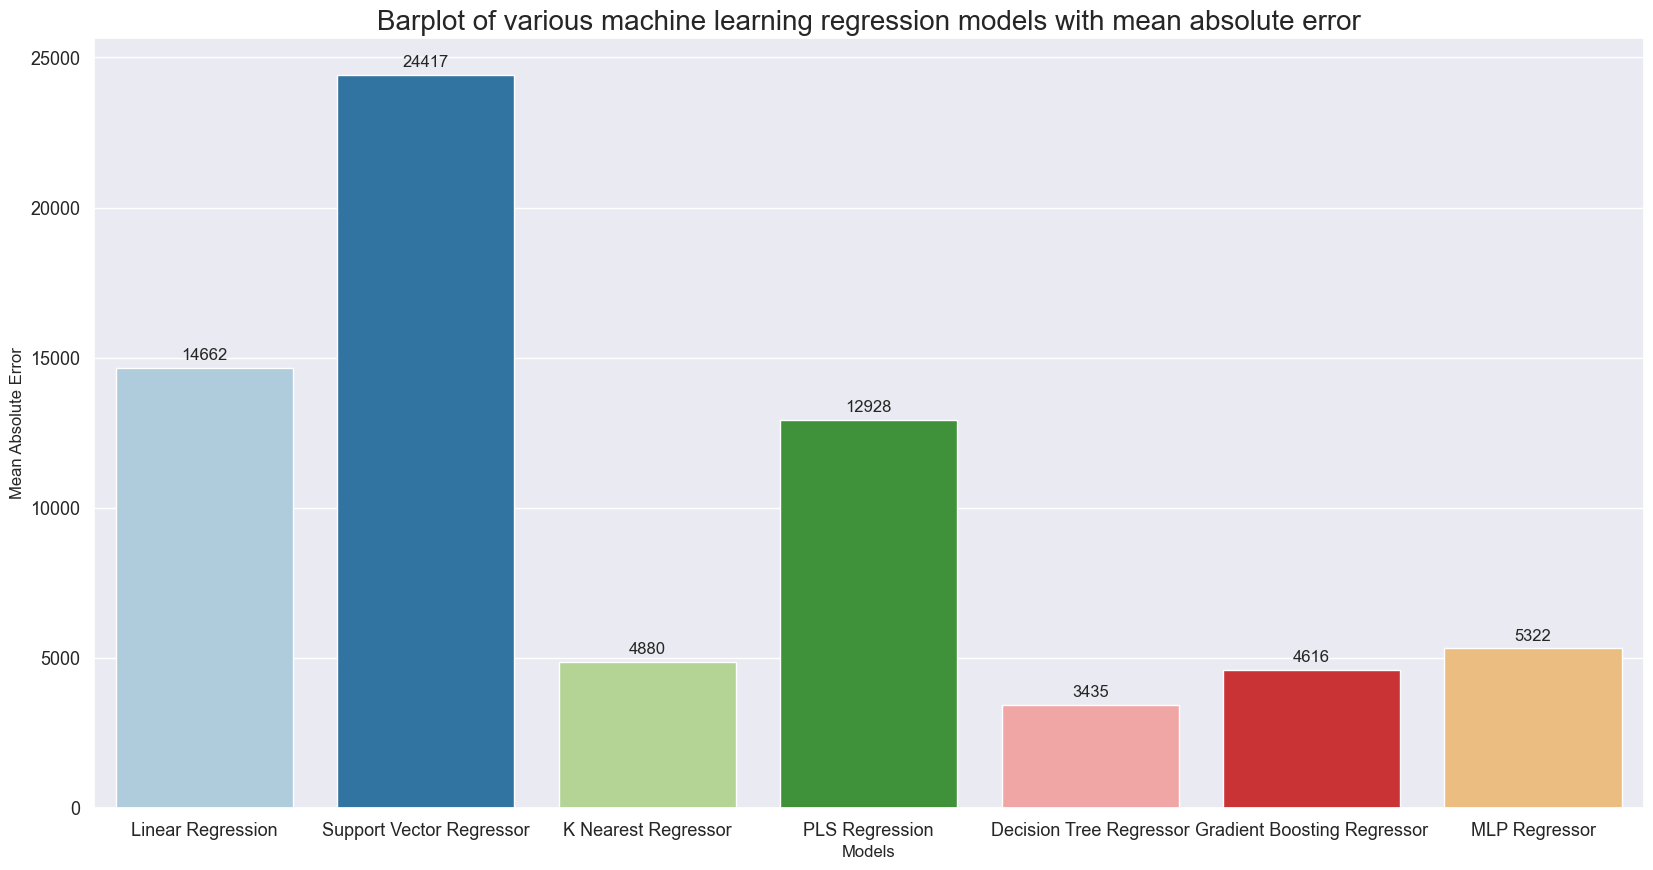

In [233]:
plt.figure(figsize = (20, 10))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Absolute Error', palette = 'Paired')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 9), 
        textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with mean absolute error", fontsize = 20)
plt.show()


As we can see, the ML model 'Support Vector Regressor' has the highest error value. The one with lowest mean absolute error is 'Decision Tree Regressor'

**Barplot of ML models with mean squared error**

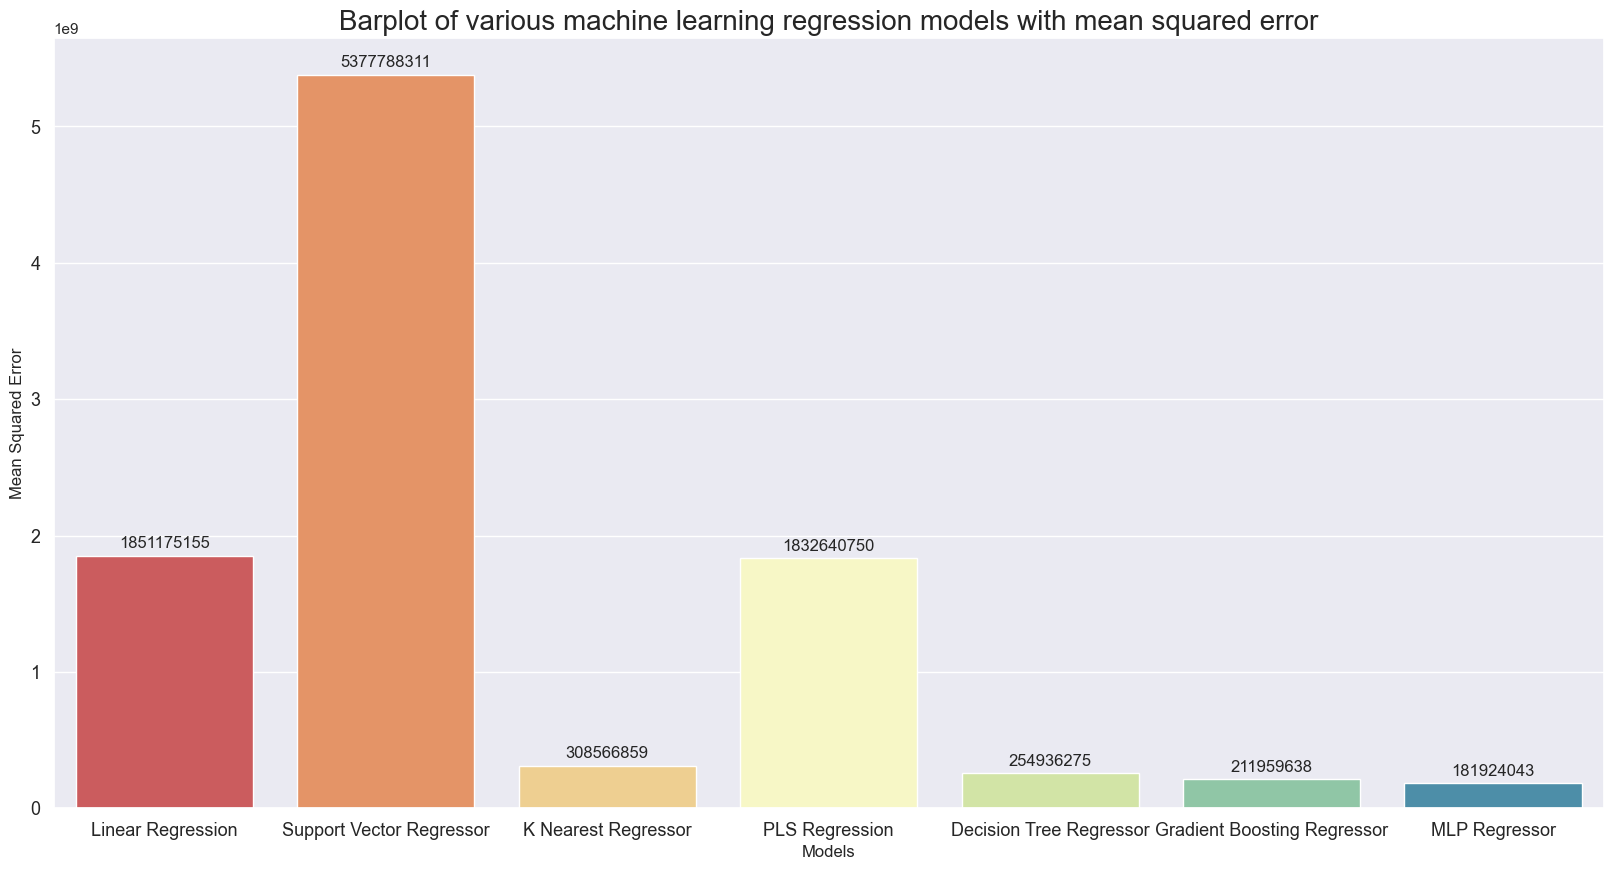

In [234]:
plt.figure(figsize = (20, 10))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Squared Error', palette = 'Spectral')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 9), 
        textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with mean squared error", fontsize = 20)
plt.show()

# Conclussion

* The most accurate model (of which we have tried in this excercise) for predictin car prices is 'Decision Tree Regression'

***Notes:***

* Different ML models lead to different values of mean absolute error and mean squared error.
* All the categorical features must be converted into numerical befor feeding them in the ML models.
* Its a good practice to shiffle the data before splitting it into training and testing sets. That way the ML models work well on new data.
* It is important to ensure that there is no missing values in our data.
* We have to remove the outliers in the data as they completelu change somoe of the important predictions and lead to an increase in error.